In [176]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns
from fitter import Fitter
import matplotlib.mlab as mlab
from scipy.spatial import ConvexHull, convex_hull_plot_2d

%run ../funtion/Funciones.ipynb

# Prova Matematica Computacional

## Input Covi19 10 marco - 28 maio

In [2]:
data = pd.read_csv("../data/Covid19_25jan_10jun.csv") 
data.drop(['iso_code','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
            'handwashing_facilities','male_smokers','female_smokers',
            'cvd_death_rate','extreme_poverty','gdp_per_capita','aged_70_older','aged_65_older',
            'median_age','population_density','population','stringency_index','tests_units',
            'total_tests_per_thousand','new_tests_smoothed_per_thousand','new_tests_smoothed',
            'new_tests_per_thousand','new_tests','total_tests','new_deaths_per_million',
            'diabetes_prevalence'],axis=1)
data['date'] = pd.to_datetime(data['date'])

## Brasil

In [3]:
covid19_brazil = data[data.location == 'Brazil']
covid19_brazil = covid19_brazil.reset_index(drop=True)
covid19_casos_brazil = covid19_brazil.new_cases[70:150].reset_index(drop=True)
covid19_total_brazil = covid19_brazil.total_cases[70:150].reset_index(drop=True)
covid19_brazil.date[70],covid19_brazil.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## United Stated

In [4]:
covid19_usa = data[data.location == 'United States']
covid19_usa = covid19_usa.reset_index(drop=True)
covid19_casos_usa = covid19_usa.new_cases[70:150].reset_index(drop=True)
covid19_total_usa = covid19_usa.total_cases[70:150].reset_index(drop=True)
covid19_usa.date[70],covid19_usa.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Canada

In [5]:
covid19_canada = data[data.location == 'Canada']
covid19_canada = covid19_canada.reset_index(drop=True)
covid19_casos_canada = covid19_canada.new_cases[70:150].reset_index(drop=True)
covid19_total_canada = covid19_canada.total_cases[70:150].reset_index(drop=True)
covid19_canada.date[70],covid19_canada.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Espanha

In [6]:
covid19_espana = data[data.location == 'Spain']
covid19_espana = covid19_espana.reset_index(drop=True)
covid19_casos_espana = covid19_espana.new_cases[70:150].reset_index(drop=True)
covid19_total_espana = covid19_espana.total_cases[70:150].reset_index(drop=True)
covid19_espana.date[70],covid19_espana.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Italia

In [7]:
covid19_italia = data[data.location == 'Italy']
covid19_italia = covid19_italia.reset_index(drop=True)
covid19_casos_italia = covid19_italia.new_cases[70:150].reset_index(drop=True)
covid19_total_italia = covid19_italia.total_cases[70:150].reset_index(drop=True)
covid19_italia.date[70],covid19_italia.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

In [350]:
x_brazil = [60,79]
y_brazil = [covid19_brazil.new_cases[130],covid19_brazil.new_cases[149]]

x_usa = [60,79]
y_usa = [covid19_usa.new_cases[130],covid19_usa.new_cases[149]]

x_canada = [60,79]
y_canada = [covid19_canada.new_cases[130],covid19_canada.new_cases[149]]

x_espana = [60,79]
y_espana = [covid19_espana.new_cases[130],covid19_espana.new_cases[149]]

x_italia = [60,79]
y_italia = [covid19_italia.new_cases[130],covid19_italia.new_cases[149]]

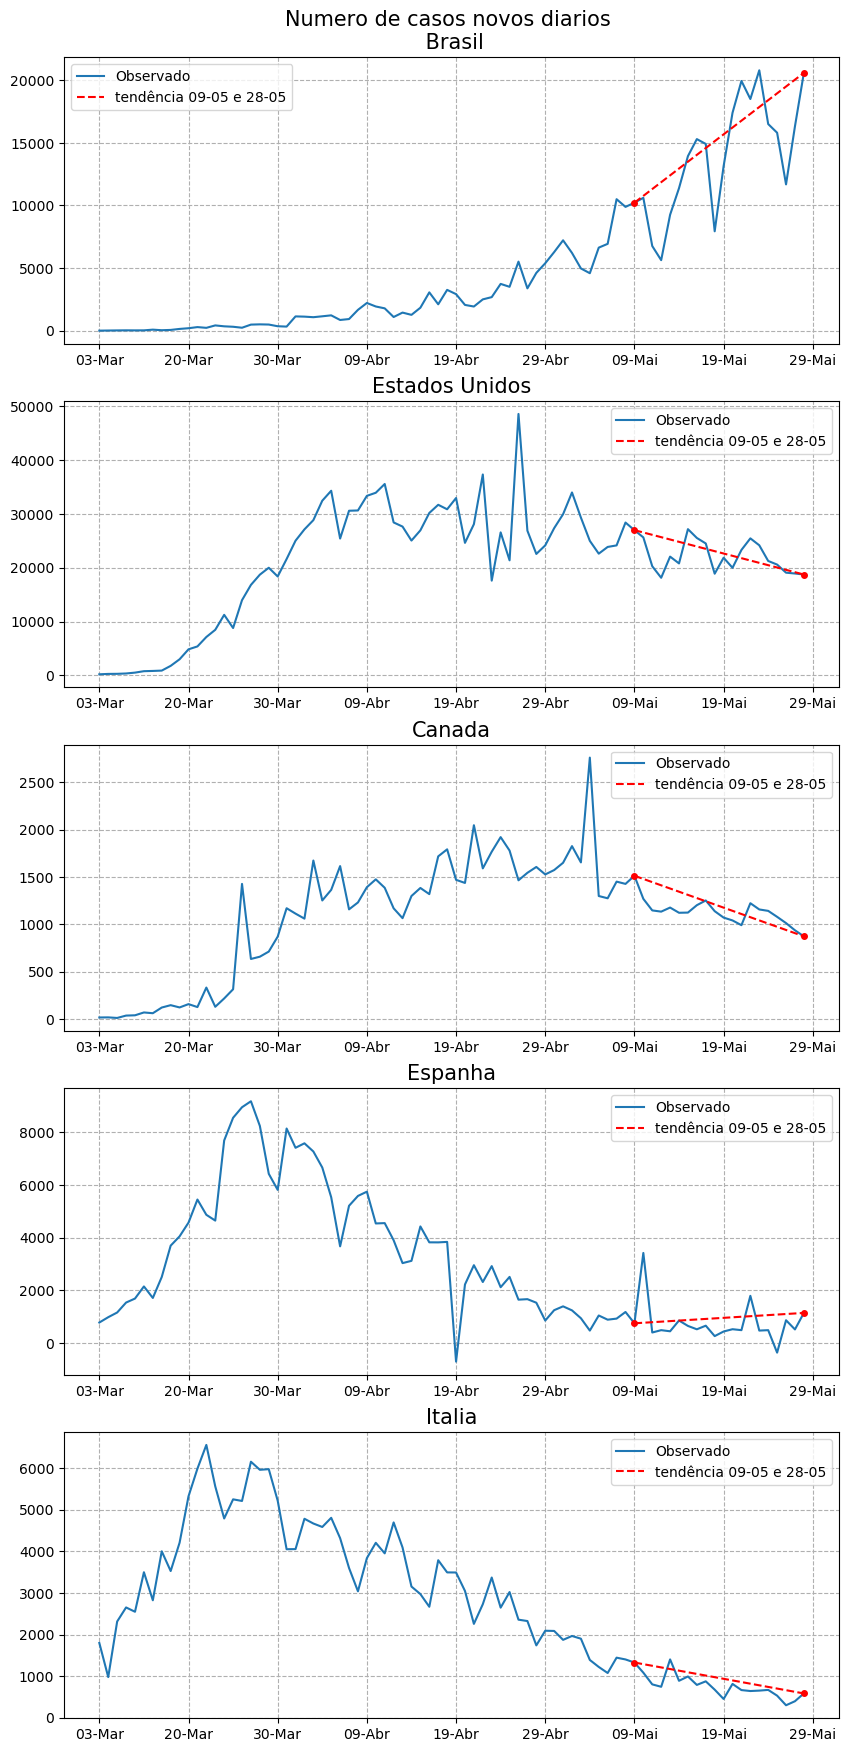

In [352]:
fig = plt.figure(figsize=(10,22),dpi=100)
x = np.arange(0,len(covid19_casos_brazil),1)

ax = plt.subplot(5,1,1)
plt.plot(x,covid19_casos_brazil,label='Observado')
plt.plot(60,covid19_brazil.new_cases[130],'ro',markersize=4)
plt.plot(79,covid19_brazil.new_cases[149],'ro',markersize=4)
plt.plot(x_brazil,y_brazil,'r--',label='tendência 09-05 e 28-05')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Numero de casos novos diarios \n Brasil',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

ax = plt.subplot(5,1,2)
plt.plot(x,covid19_casos_usa,label='Observado')
plt.plot(60,covid19_usa.new_cases[130],'ro',markersize=4)
plt.plot(79,covid19_usa.new_cases[149],'ro',markersize=4)
plt.plot(x_usa,y_usa,'r--',label='tendência 09-05 e 28-05')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Estados Unidos',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

ax = plt.subplot(5,1,3)
plt.plot(x,covid19_casos_canada,label='Observado')
plt.plot(60,covid19_canada.new_cases[130],'ro',markersize=4)
plt.plot(79,covid19_canada.new_cases[149],'ro',markersize=4)
plt.plot(x_canada,y_canada,'r--',label='tendência 09-05 e 28-05')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Canada',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

ax = plt.subplot(5,1,4)
plt.plot(x,covid19_casos_espana,label='Observado')
plt.plot(60,covid19_espana.new_cases[130],'ro',markersize=4)
plt.plot(79,covid19_espana.new_cases[149],'ro',markersize=4)
plt.plot(x_espana,y_espana,'r--',label='tendência 09-05 e 28-05')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Espanha',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

ax = plt.subplot(5,1,5)
plt.plot(x,covid19_casos_italia,label='Observado')
plt.plot(60,covid19_italia.new_cases[130],'ro',markersize=4)
plt.plot(79,covid19_italia.new_cases[149],'ro',markersize=4)
plt.plot(x_italia,y_italia,'r--',label='tendência 09-05 e 28-05')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Italia',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

### Pode-se observar facilmente a partir da figura acima que o Brasil tem uma tendência a aumentar o número de novos casos, enquanto os outros países apresentam uma queda ou um ligeiro aumento na série.

## 5 Paises

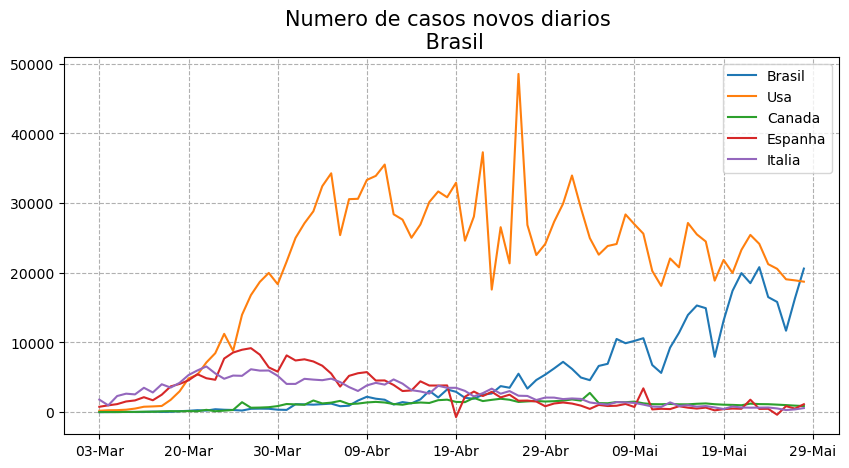

In [9]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
x = np.arange(0,len(covid19_casos_brazil),1)

plt.plot(x,covid19_casos_brazil,label='Brasil')
plt.plot(x,covid19_casos_usa,label='Usa')
plt.plot(x,covid19_casos_canada,label='Canada')
plt.plot(x,covid19_casos_espana,label='Espanha')
plt.plot(x,covid19_casos_italia,label='Italia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Numero de casos novos diarios \n Brasil',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

## Plot 1 - Histograma

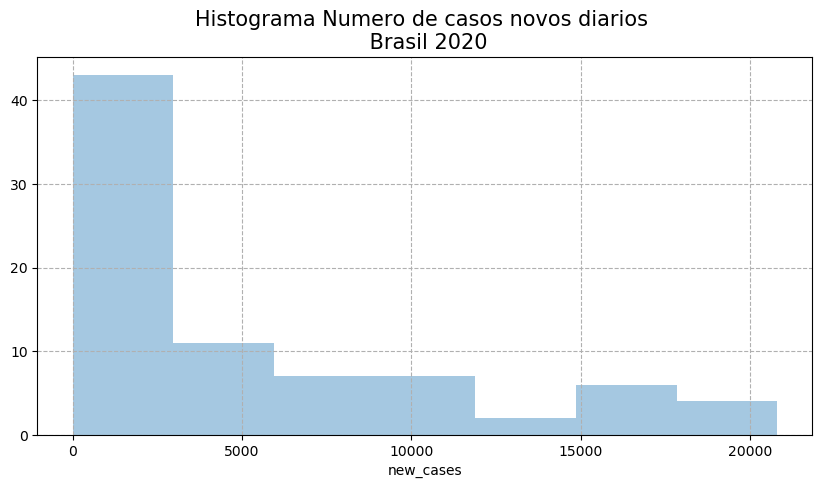

In [10]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_brazil,kde=False)
plt.title('Histograma Numero de casos novos diarios \n Brasil 2020',fontsize=15)
plt.grid('on',linestyle='--')

## Plot 2 - Espaco de Cullen-Frey
## Brasil

<Figure size 4400x4000 with 0 Axes>

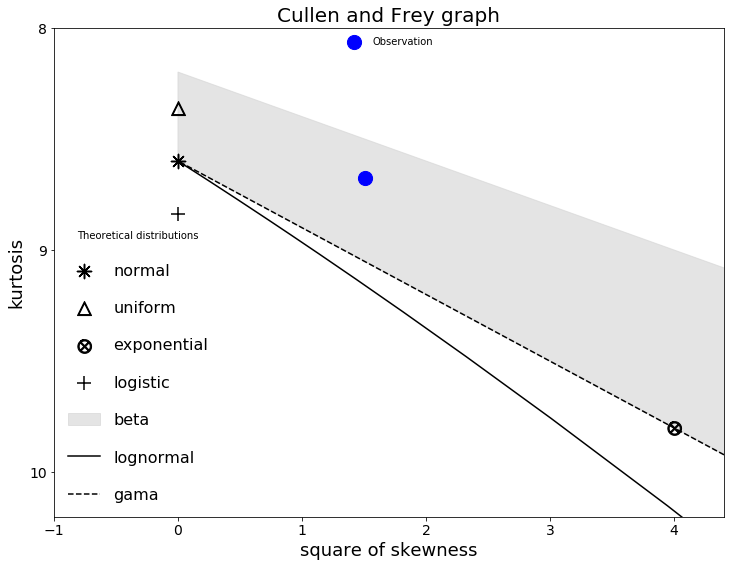

In [78]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_brazil))

## USA

<Figure size 4400x4000 with 0 Axes>

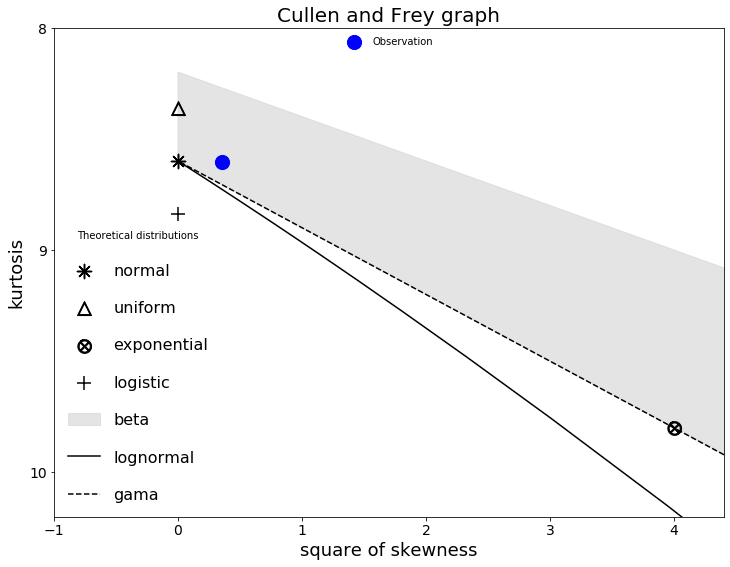

In [12]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_usa))

## Canada

<Figure size 4400x4000 with 0 Axes>

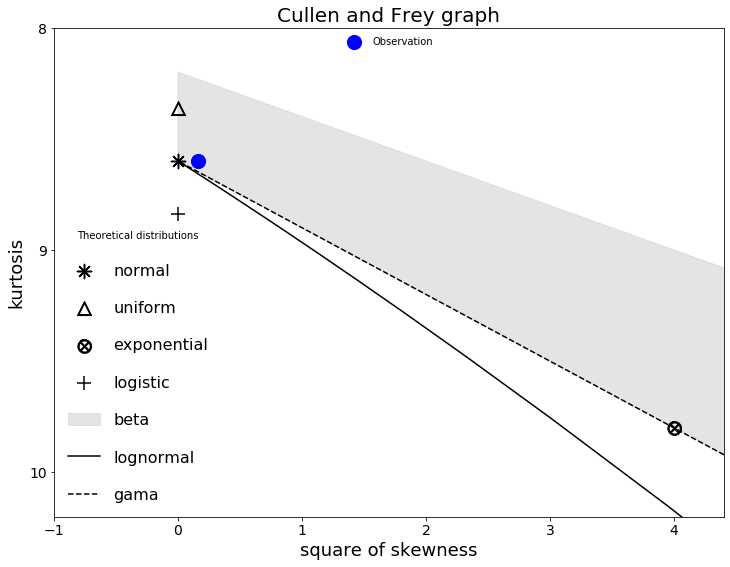

In [13]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_canada))

## Espanha

<Figure size 4400x4000 with 0 Axes>

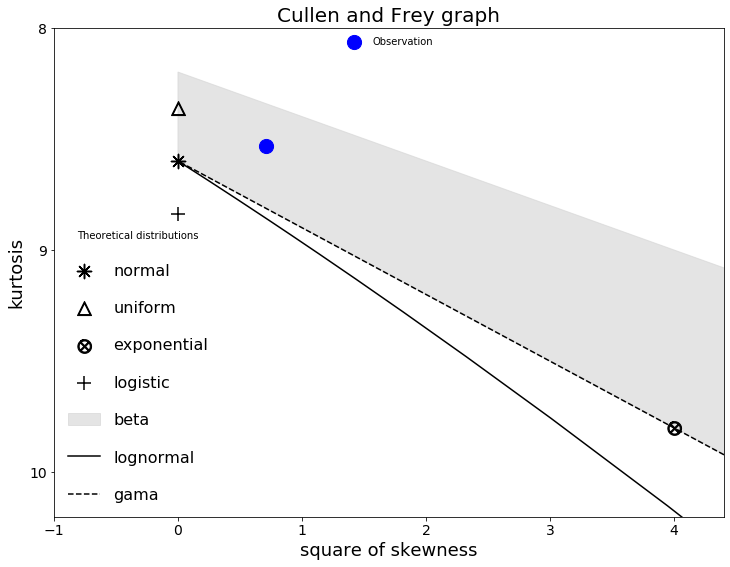

In [14]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_espana))

## Italia

<Figure size 4400x4000 with 0 Axes>

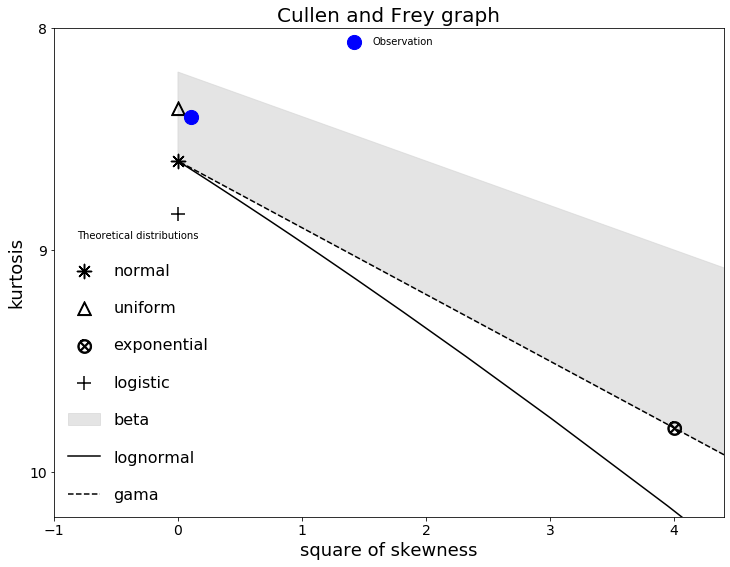

In [15]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_italia))

## Usando o moludo Fitter

Fitted uniform distribution with error=8.448584367219192e-07)
Fitted beta distribution with error=5.666467212985345e-07)
Fitted gamma distribution with error=4.2332957763483014e-07)
Fitted norm distribution with error=8.157505433972135e-07)


sumsquare_error          aic          bic  kl_div
gamma       4.233296e-07  2200.889717 -1511.425236     inf
beta        5.666467e-07  2037.561467 -1483.716408     inf
norm        8.157505e-07  2107.235689 -1463.330656     inf
uniform     8.448584e-07  1992.570497 -1460.525818     inf

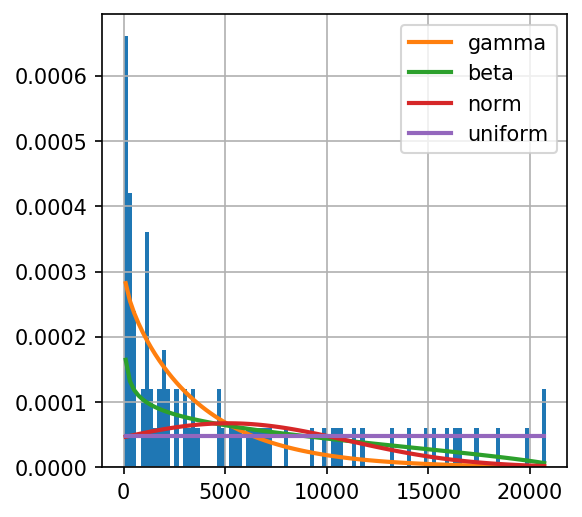

In [77]:
f = Fitter(covid19_casos_brazil, distributions=['uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

Fitted uniform distribution with error=8.295185324460727e-08)
Fitted beta distribution with error=6.40901594140013e-08)
Fitted gamma distribution with error=7.008368901493928e-08)
Fitted norm distribution with error=6.840027087947067e-08)


sumsquare_error          aic          bic  kl_div
beta        6.409016e-08  2255.968235 -1658.072025     inf
norm        6.840027e-08  2225.361849 -1661.629202     inf
gamma       7.008369e-08  2221.621676 -1655.302111     inf
uniform     8.295185e-08  2161.157415 -1646.198516     inf

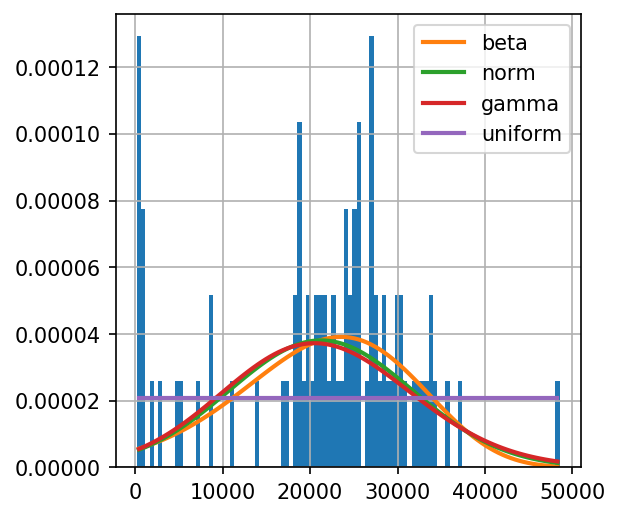

In [73]:
f = Fitter(covid19_casos_usa, distributions=['uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

Fitted uniform distribution with error=2.933884297520661e-05)
Fitted beta distribution with error=2.356307424983177e-05)
Fitted gamma distribution with error=2.5069194191347437e-05)
Fitted norm distribution with error=2.4562148643534425e-05)


sumsquare_error          aic          bic  kl_div
beta            0.000024  1702.797417 -1185.500402     inf
norm            0.000025  1673.398698 -1190.942395     inf
gamma           0.000025  1667.901950 -1184.925714     inf
uniform         0.000029  1587.871238 -1176.725935     inf

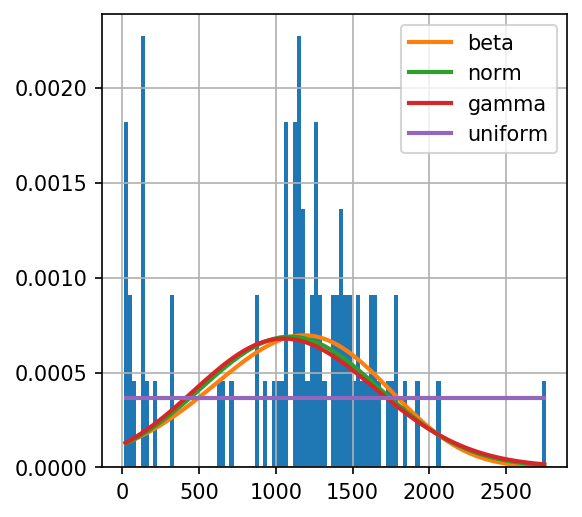

In [70]:
f = Fitter(covid19_casos_canada, distributions=['uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

Fitted uniform distribution with error=2.011160631376641e-06)
Fitted beta distribution with error=1.850304827709695e-06)
Fitted gamma distribution with error=1.654691453362229e-06)
Fitted norm distribution with error=1.9368597334462233e-06)


sumsquare_error          aic          bic  kl_div
gamma           0.000002  1907.748786 -1402.367731     inf
beta            0.000002  1867.768955 -1389.046837     inf
norm            0.000002  1907.370653 -1394.153485     inf
uniform         0.000002  1843.936758 -1391.141963     inf

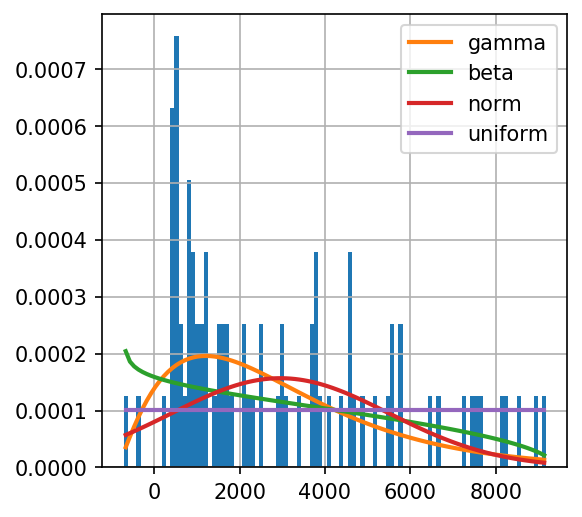

In [66]:
f = Fitter(covid19_casos_espana, distributions=['uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

Fitted uniform distribution with error=3.991055030352597e-06)
Fitted beta distribution with error=3.6901681971748306e-06)
Fitted gamma distribution with error=3.897781036923021e-06)
Fitted norm distribution with error=4.131828782745431e-06)


sumsquare_error          aic          bic  kl_div
beta            0.000004  1767.549861 -1333.821106     inf
gamma           0.000004  1807.945790 -1333.824301     inf
uniform         0.000004  1752.291223 -1336.314473     inf
norm            0.000004  1801.821815 -1333.541313     inf

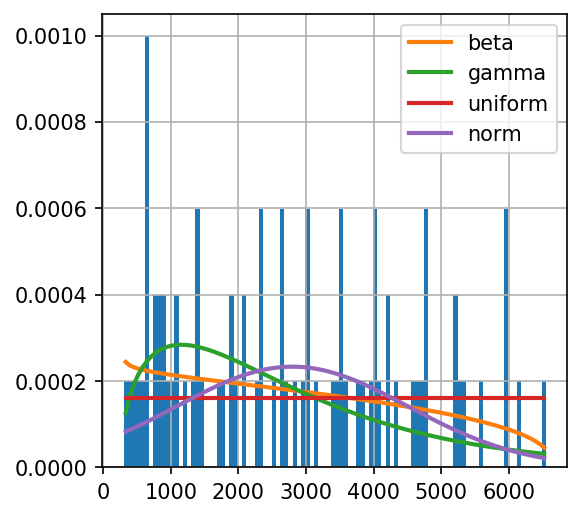

In [67]:
f = Fitter(covid19_casos_italia, distributions=['uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

## Os 5 paises apresentam uma distribuicao de tipo beta

## Plot 3 - Ajuste Histograma
## Brasil

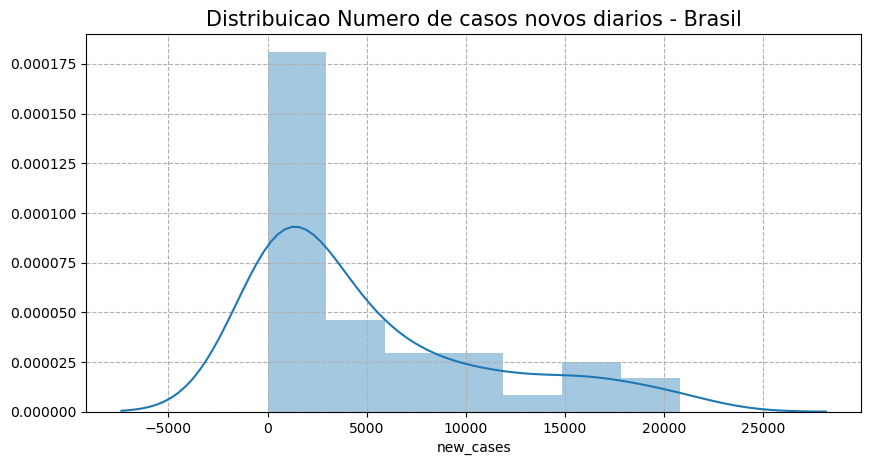

In [16]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_brazil,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Brasil',fontsize=15)
plt.grid('on',linestyle='--')

## USA

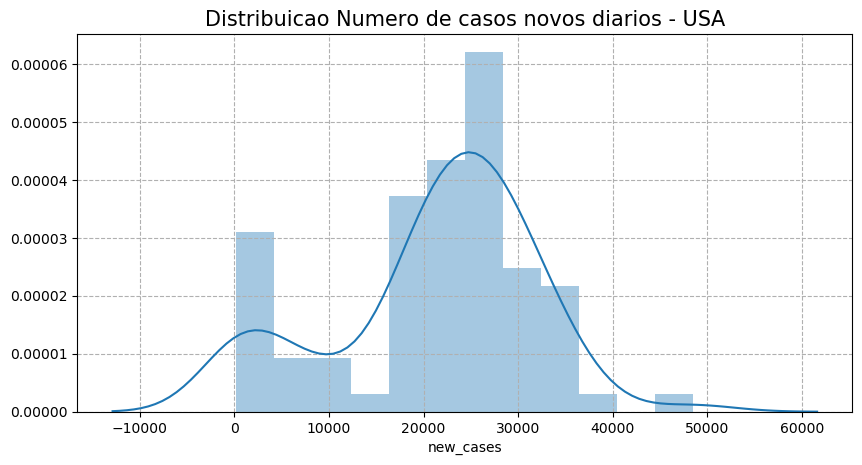

In [17]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_usa,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - USA',fontsize=15)
plt.grid('on',linestyle='--')

## Canada

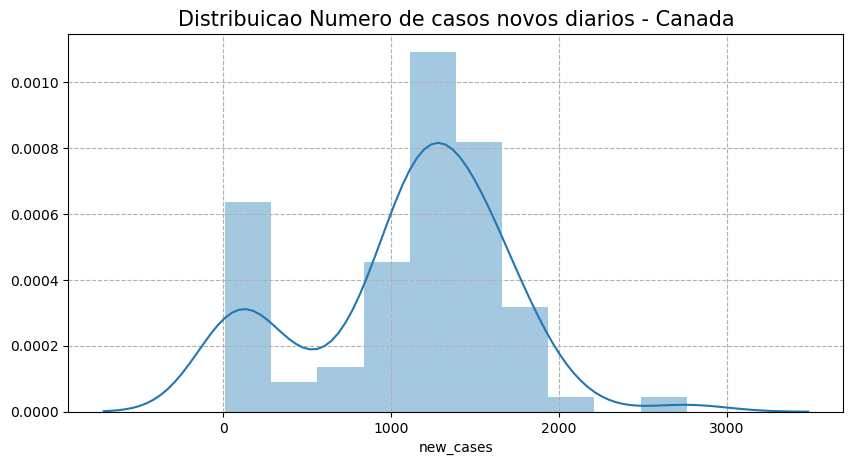

In [18]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_canada,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Canada',fontsize=15)
plt.grid('on',linestyle='--')

## Espanha

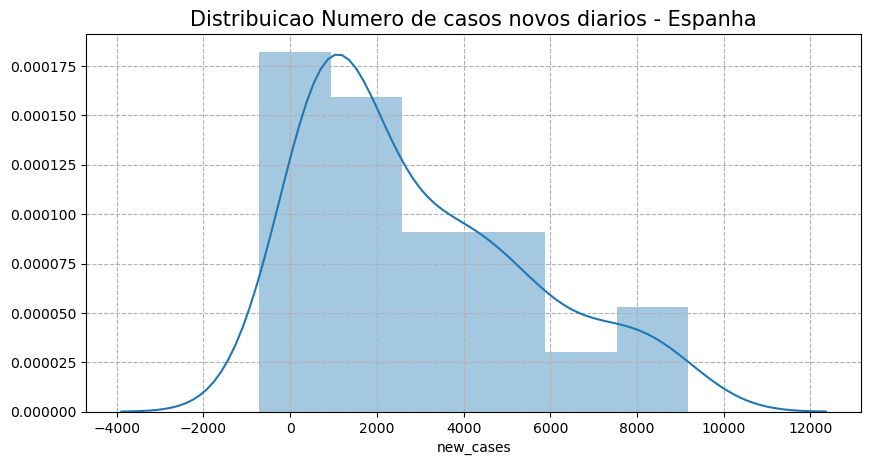

In [19]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_espana,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Espanha',fontsize=15)
plt.grid('on',linestyle='--')

## Italia

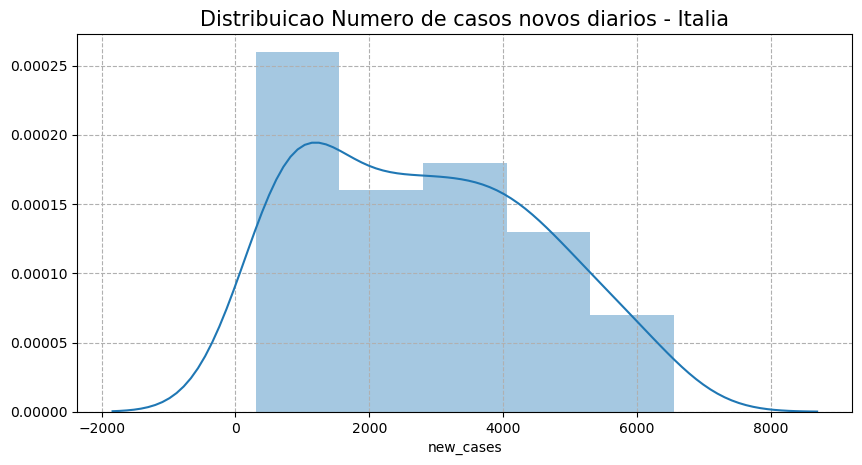

In [20]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_italia,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Italia',fontsize=15)
plt.grid('on',linestyle='--')

## Figura 4 - Indice Espectral 
## Alpha e Betha
## Brasil

Alpha Brasil:  1.1173218115178365
Beta Teorico Brasil:  1.234643623035673


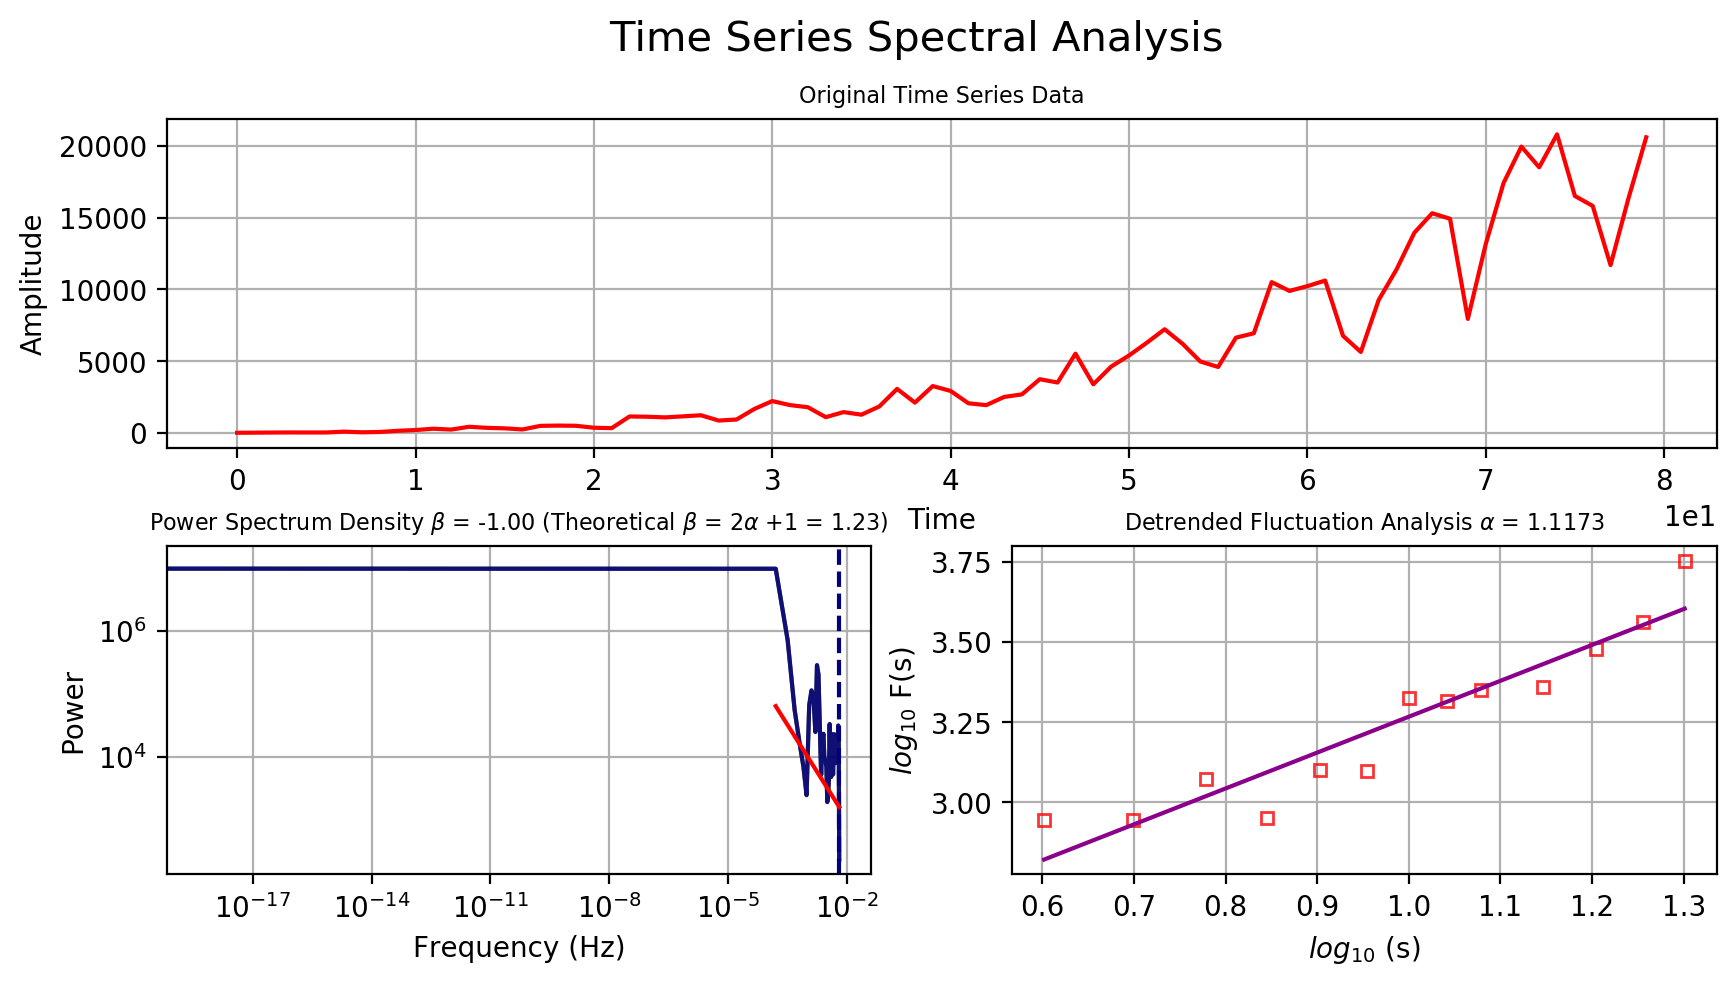

In [21]:
alpha_brasil, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_brazil,1)
beta_brasil = 2 * alpha_brasil - 1

print('Alpha Brasil: ',alpha_brasil)
print('Beta Teorico Brasil: ',beta_brasil)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_brazil)
    plt.show()

Alpha usa:  0.9925830855515558
Beta Teorico usa:  0.9851661711031117


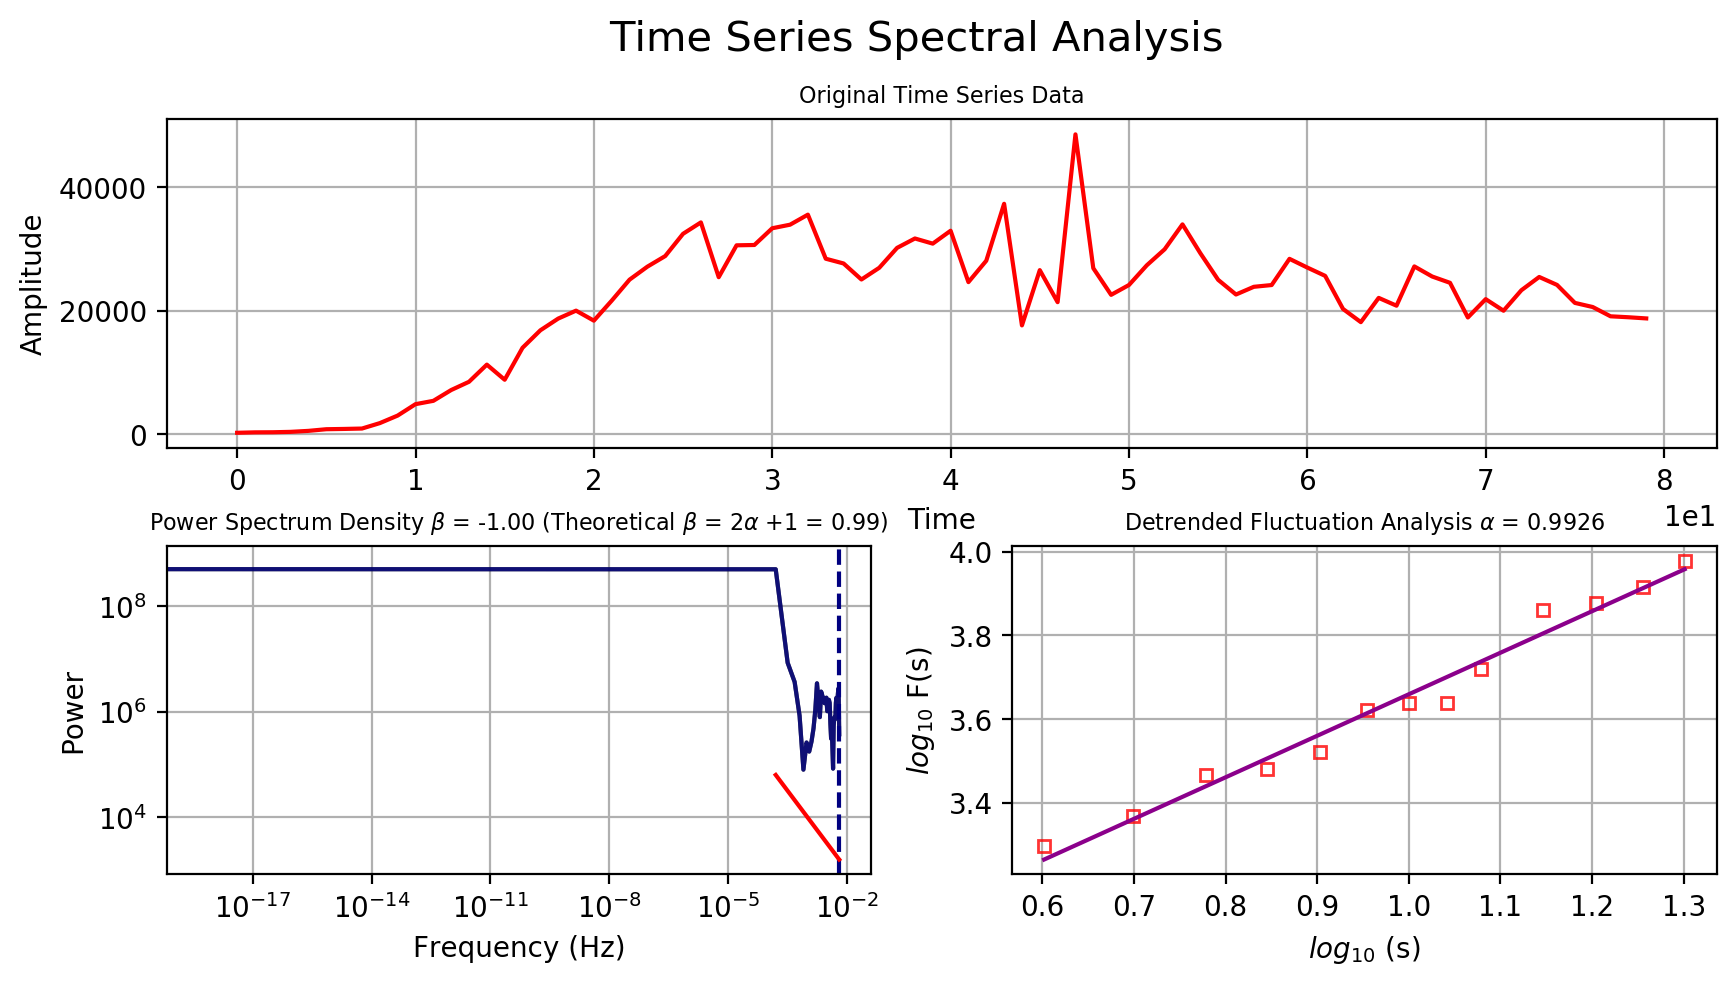

In [22]:
alpha_usa, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_usa,1)
beta_usa = 2 * alpha_usa - 1

print('Alpha usa: ',alpha_usa)
print('Beta Teorico usa: ',beta_usa)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_usa)
    plt.show()

Alpha canada:  1.0443529412060741
Beta Teorico canada:  1.0887058824121483


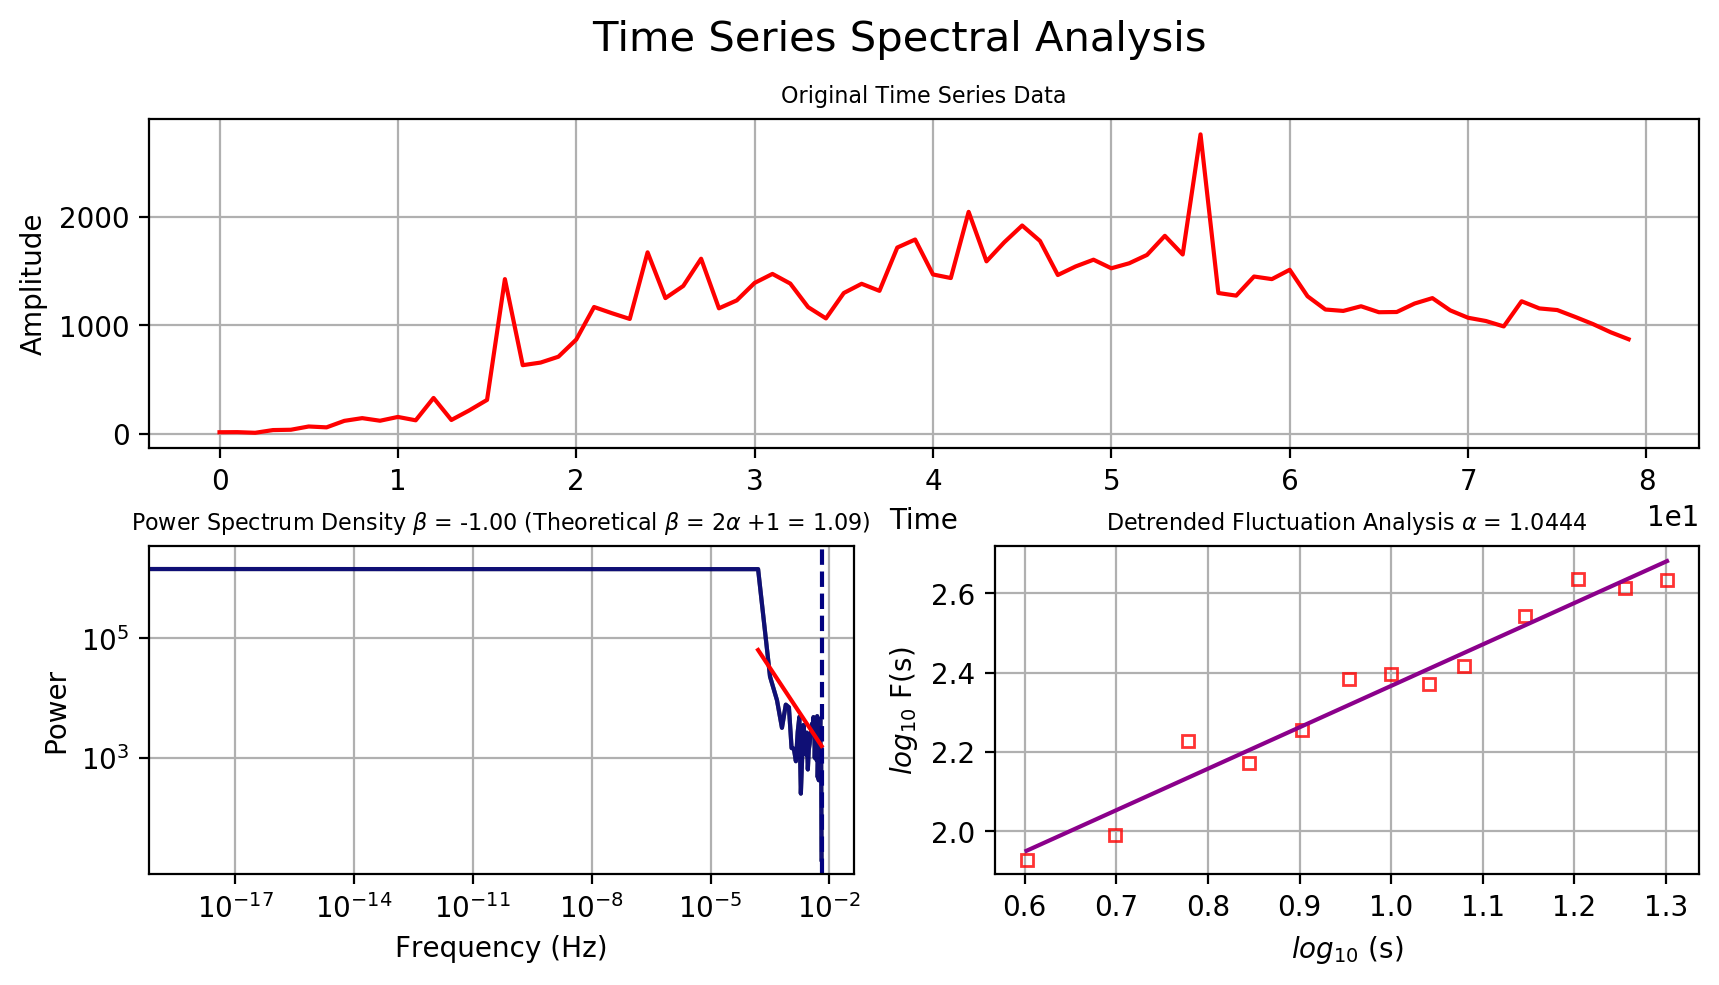

In [23]:
alpha_canada, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_canada,1)
beta_canada = 2 * alpha_canada - 1

print('Alpha canada: ',alpha_canada)
print('Beta Teorico canada: ',beta_canada)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_canada)
    plt.show()

Alpha espana:  1.4658380876823862
Beta Teorico espana:  1.9316761753647724


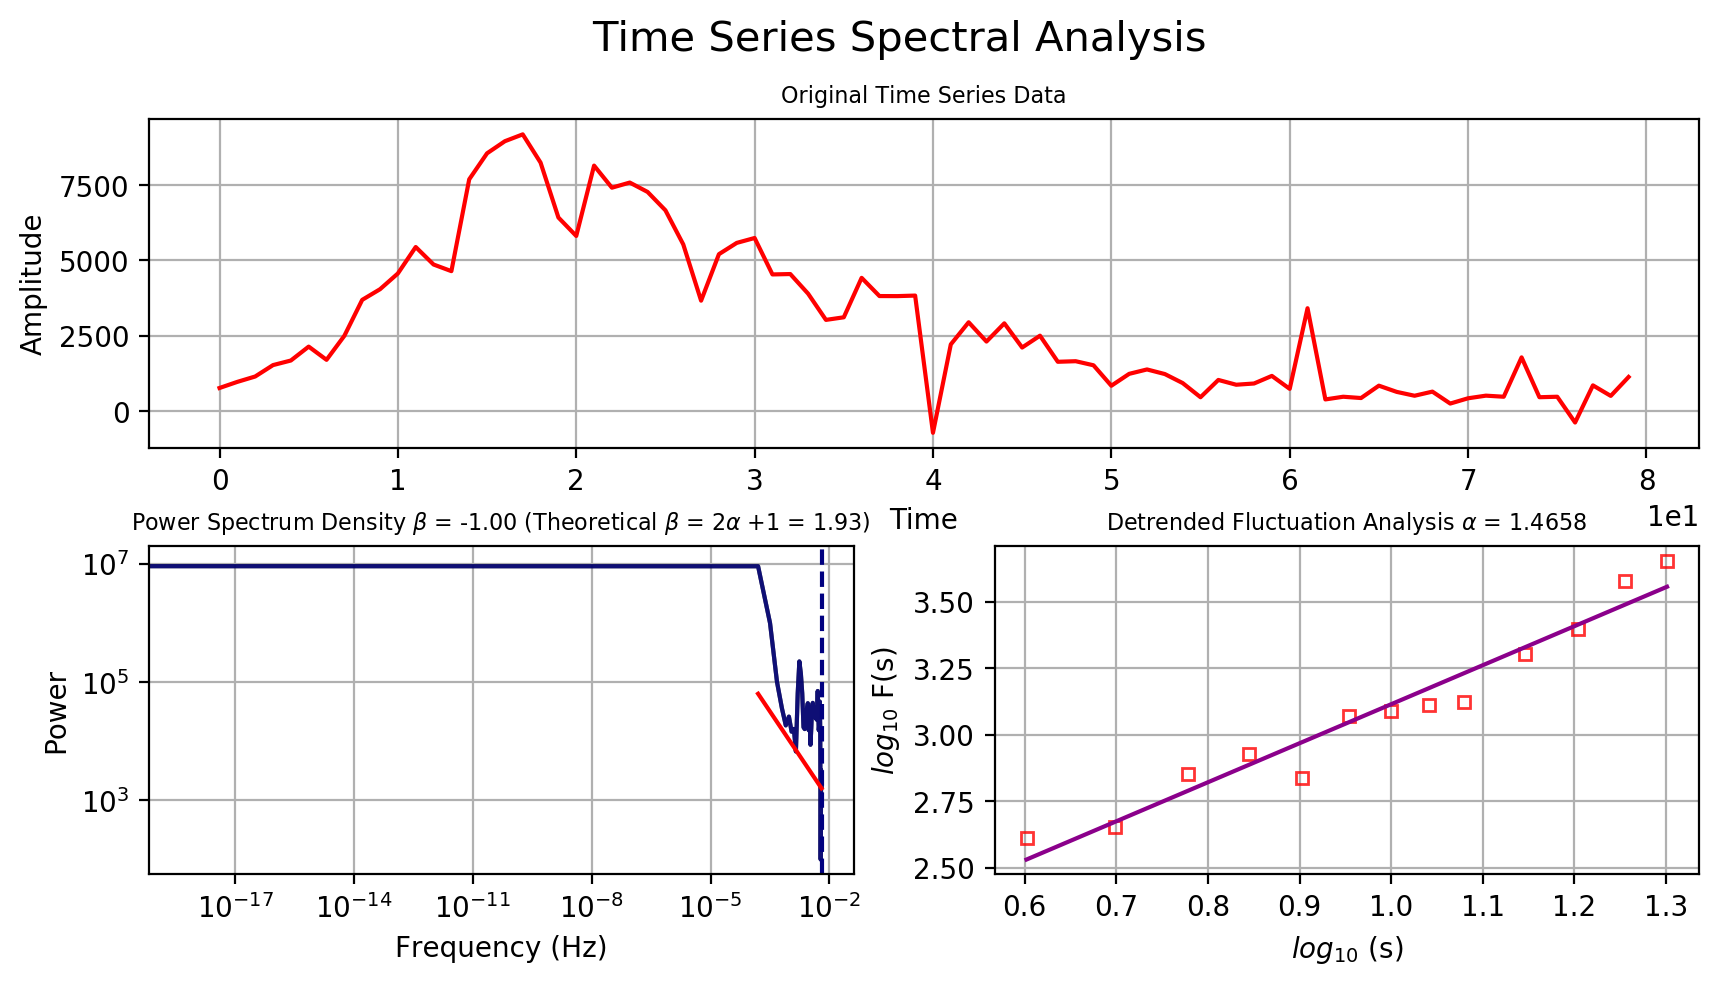

In [24]:
alpha_espana, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_espana,1)
beta_espana = 2 * alpha_espana - 1

print('Alpha espana: ',alpha_espana)
print('Beta Teorico espana: ',beta_espana)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_espana)
    plt.show()

Alpha italia:  1.506143795326534
Beta Teorico italia:  2.012287590653068


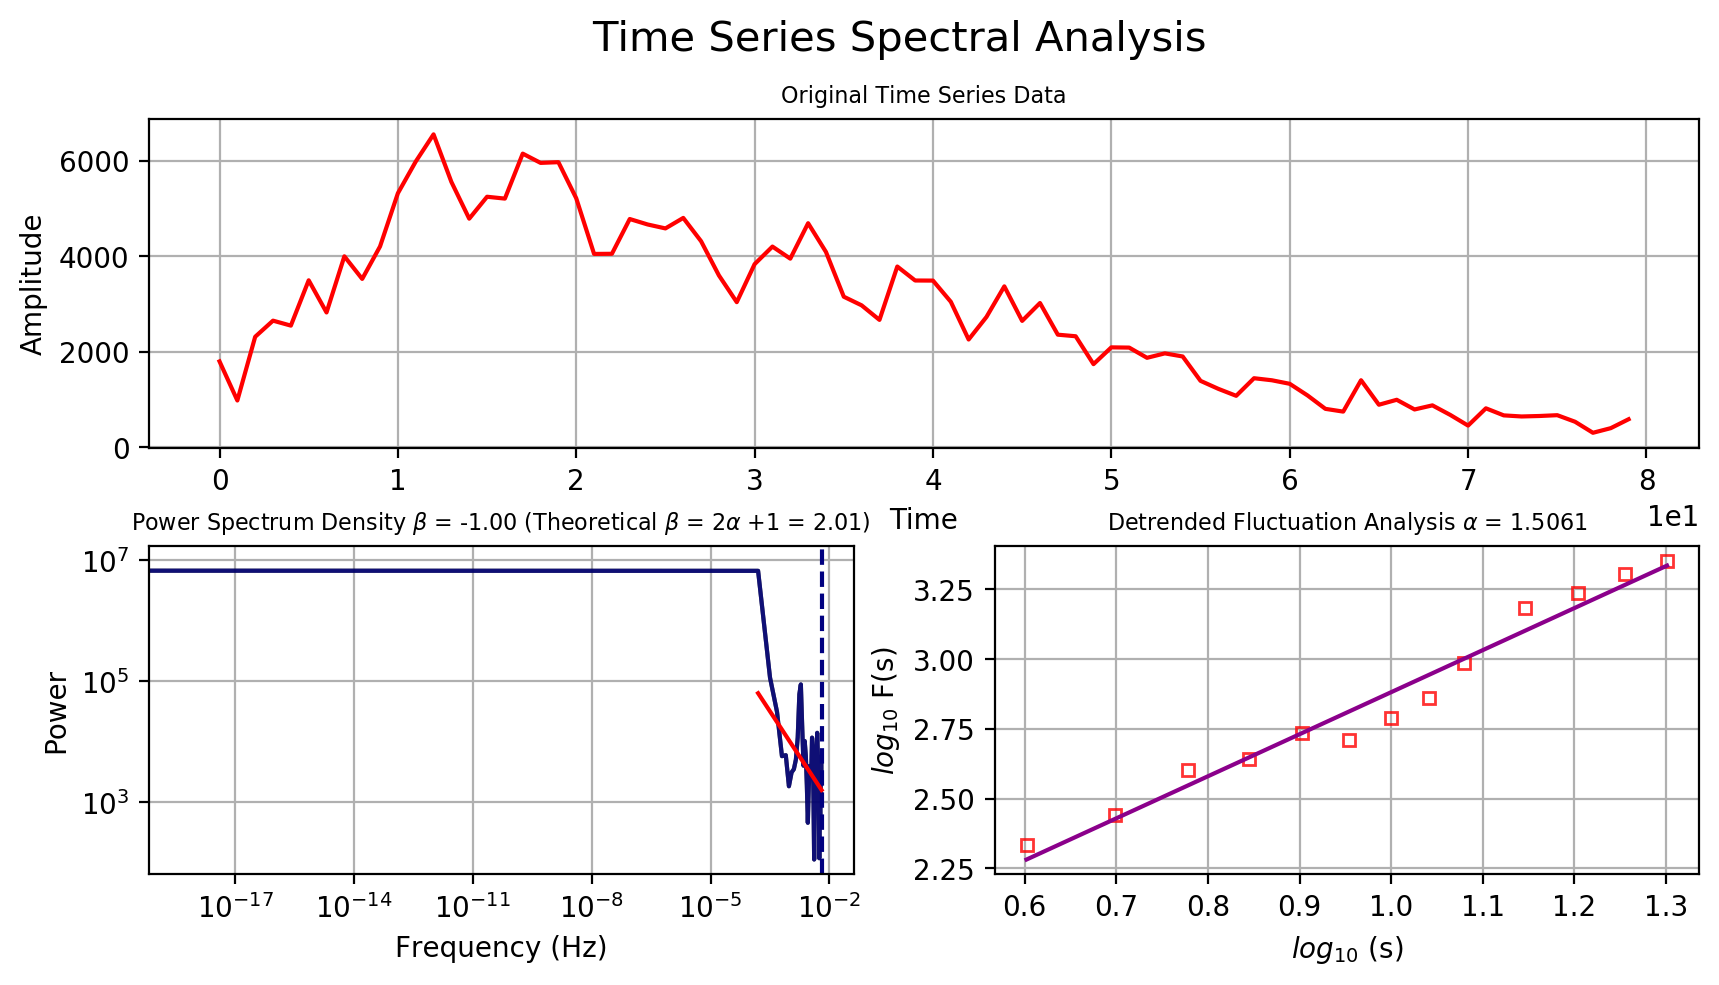

In [25]:
alpha_italia, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_italia,1)
beta_italia = 2 * alpha_italia - 1

print('Alpha italia: ',alpha_italia)
print('Beta Teorico italia: ',beta_italia)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_italia)
    plt.show()

## Plot 5 - Espectro de Singularidades

In [26]:
def espectro_singularidad(data):
    
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(data)
    
    alpha = stats['LH']
    f_alpha = stats['f']
    
    alpha_max = stats['LH_max']
    alpha_min = stats['LH_min']
    
    j = np.where(f_alpha == max(f_alpha))
    alpha_zero = float(stats['f'][j[0]])
    
    Delta_alpha = alpha_max - alpha_min
    A_alpha = (alpha_zero - alpha_min) / (alpha_max - alpha_zero)
    
    return alpha,f_alpha,alpha_zero,Delta_alpha,A_alpha

In [27]:
alpha_b,f_alpha_b,alpha_zero_b,Delta_alpha_b,A_alpha_b = espectro_singularidad(covid19_casos_brazil)
alpha_u,f_alpha_u,alpha_zero_u,Delta_alpha_u,A_alpha_u = espectro_singularidad(covid19_casos_usa)
alpha_c,f_alpha_c,alpha_zero_c,Delta_alpha_c,A_alpha_c = espectro_singularidad(covid19_casos_canada)
alpha_e,f_alpha_e,alpha_zero_e,Delta_alpha_e,A_alpha_e = espectro_singularidad(covid19_casos_espana)
alpha_i,f_alpha_i,alpha_zero_i,Delta_alpha_i,A_alpha_i = espectro_singularidad(covid19_casos_italia)

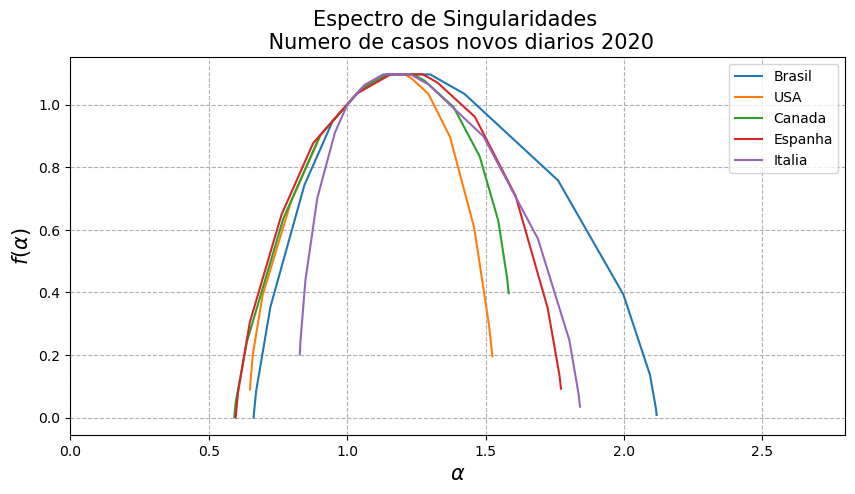

In [28]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(alpha_b,f_alpha_b,label='Brasil')
plt.plot(alpha_u,f_alpha_u,label='USA')
plt.plot(alpha_c,f_alpha_c,label='Canada')
plt.plot(alpha_e,f_alpha_e,label='Espanha')
plt.plot(alpha_i,f_alpha_i,label='Italia')

plt.title('Espectro de Singularidades \n Numero de casos novos diarios 2020',fontsize=15)
plt.grid('on',linestyle='--')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel(r'$f(\alpha)$',fontsize=15)
plt.xlim(0,2.8)
plt.legend()

## Apartir do exercicio 7 da lista, onde foi computado o espectro de singularidades de todas as serie usadas, para el espectro mostrado pelos datos de covid19, este se encontra mais similar ao espectro obtido das series Pm Noise (endogenas e exogenas.)

## Tabela final de valores

In [29]:
Data_b = pd.DataFrame({'Pais':'Brasil','Alpha':[alpha_brasil],'Betha':[beta_brasil],
                       'Alpha_zero':[alpha_zero_b],'Delta_Alpha':[Delta_alpha_b],'A_Alpha':[A_alpha_b]})
Data_u = pd.DataFrame({'Pais':'Usa','Alpha':[alpha_usa],'Betha':[beta_usa],
                       'Alpha_zero':[alpha_zero_u],'Delta_Alpha':[Delta_alpha_u],'A_Alpha':[A_alpha_u]})
Data_c = pd.DataFrame({'Pais':'Canada','Alpha':[alpha_canada],'Betha':[beta_canada],
                       'Alpha_zero':[alpha_zero_c],'Delta_Alpha':[Delta_alpha_c],'A_Alpha':[A_alpha_c]})
Data_e = pd.DataFrame({'Pais':'Espanha','Alpha':[alpha_espana],'Betha':[beta_espana],
                       'Alpha_zero':[alpha_zero_e],'Delta_Alpha':[Delta_alpha_e],'A_Alpha':[A_alpha_e]})
Data_i = pd.DataFrame({'Pais':'Italia','Alpha':[alpha_italia],'Betha':[beta_italia],
                       'Alpha_zero':[alpha_zero_i],'Delta_Alpha':[Delta_alpha_i],'A_Alpha':[A_alpha_i]})
finalDf = pd.concat([Data_b,Data_u,Data_c,Data_e,Data_i]).reset_index(drop=True)
finalDf.head()

Pais     Alpha     Betha  Alpha_zero  Delta_Alpha   A_Alpha
0   Brasil  1.117322  1.234644    1.096578     1.456057  0.425581
1      Usa  0.992583  0.985166    1.096578     0.875714  1.045522
2   Canada  1.044353  1.088706    1.096578     0.991483  1.035491
3  Espanha  1.465838  1.931676    1.096578     1.175086  0.738943
4   Italia  1.506144  2.012288    1.096578     1.012457  0.359822

## Na tabela anterior pode-se ver que o Brasil tem o maior delta alfa, seguido pela Espanha e depois pela Itália.

## Usando as areas de cada uma das familias para alpha e betha, obtidas no exercicio 6 da lista

In [30]:
noise,Color_noise_pink,Color_noise_red,Color_noise_white,pm_noise,chaos_noise = Area_noise()

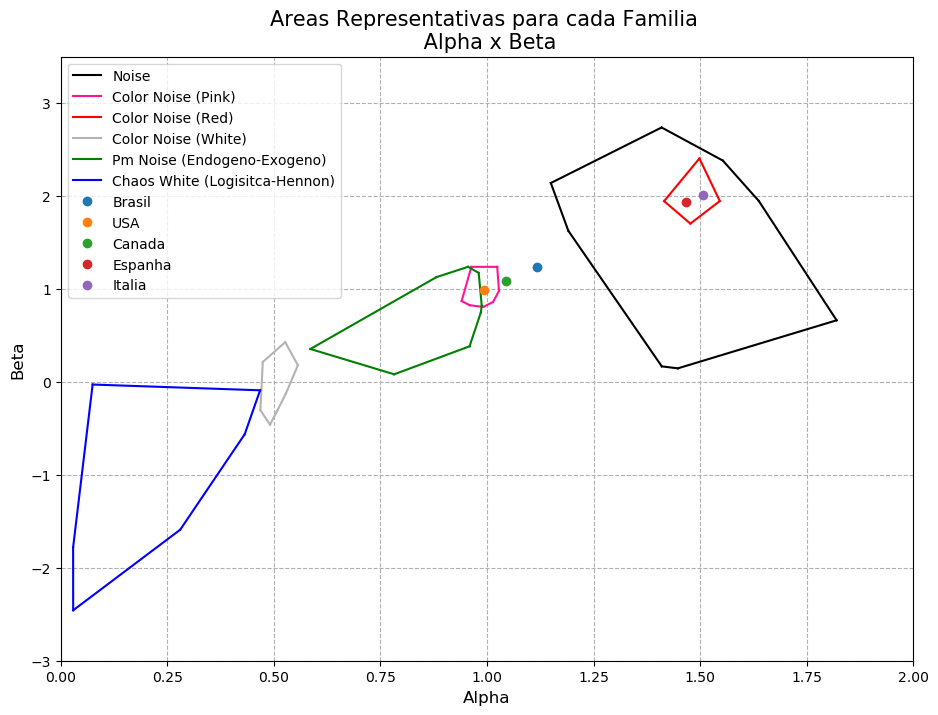

In [130]:
fig, ax = plt.subplots(figsize=(11,8),dpi=100)
for i in range(len(noise)):
    plt.plot(noise[i,0:2],noise[i,2:4],'k-',label='Noise')
    
for i in range(len(Color_noise_pink)):
    plt.plot(Color_noise_pink[i,0:2],Color_noise_pink[i,2:4],color='deeppink',label='Color Noise (Pink)')
    
for i in range(len(Color_noise_red)):
    plt.plot(Color_noise_red[i,0:2],Color_noise_red[i,2:4],'r-',label='Color Noise (Red)')
    
for i in range(len(Color_noise_white)):
    plt.plot(Color_noise_white[i,0:2],Color_noise_white[i,2:4],color='0.7',label='Color Noise (White)')
    
for i in range(len(pm_noise)):
    plt.plot(pm_noise[i,0:2],pm_noise[i,2:4],'g-',label='Pm Noise (Endogeno-Exogeno)')
    
for i in range(len(chaos_noise)):
    plt.plot(chaos_noise[i,0:2],chaos_noise[i,2:4],'b-',label='Chaos White (Logisitca-Hennon)')
    
plt.plot(alpha_brasil,beta_brasil,'o',label = 'Brasil')
plt.plot(alpha_usa,beta_usa,'o',label = 'USA')
plt.plot(alpha_canada,beta_canada,'o',label = 'Canada')
plt.plot(alpha_espana,beta_espana,'o',label = 'Espanha')
plt.plot(alpha_italia,beta_italia,'o',label = 'Italia')
    
plt.xlabel('Alpha',fontsize=12)
plt.ylabel('Beta',fontsize=12)

plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')

plt.title('Areas Representativas para cada Familia \n Alpha x Beta',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Os pontos relacionados à Espanha e Itália, usando os resultados do exercício 6 da lista, são encontrados na area referentes ao Red Noise, embora próximos a esse ponto também estejam os sinais estocásticos gerados pelo algoritmo GRNG1.py.

## Para o USA este se encontra dentro da area referentes ao sinal do tipo Pink Noise 

## Implementacao das equacoes master do modelo IMC-SF-COVID19

In [81]:
def IMC_SF_COVID19_v1(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])

    for i in range(73):
        N7 = np.mean(data[i:i+7])
#        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
                    
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
    
    return Ns_min,Ns_max,Ns_mean

## Foram criados 3 conjuntos para os valores de p
### Conjunto 1
### p1 = 0.5, p2 = 0.45, p3 = 0.05

In [149]:
p11 = 0.5;p12 = 0.45;p13 = 0.05

brazil_min1,brazil_max1,brazil_mean1 = IMC_SF_COVID19_v1(covid19_casos_brazil,p11,p12,p13)  

usa_min1,usa_max1,usa_mean1 = IMC_SF_COVID19_v1(covid19_casos_usa,p11,p12,p13)

canada_min1,canada_max1,canada_mean1 = IMC_SF_COVID19_v1(covid19_casos_canada,p11,p12,p13)

espana_min1,espana_max1,espana_mean1 = IMC_SF_COVID19_v1(covid19_casos_espana,p11,p12,p13)

italia_min1,italia_max1,italia_mean1 = IMC_SF_COVID19_v1(covid19_casos_italia,p11,p12,p13)

### Conjunto 2
### p1 = 0.7, p2 = 0.25, p3 = 0.05

In [150]:
p21 = 0.7; p22 = 0.25; p23 = 0.05

brazil_min2,brazil_max2,brazil_mean2 = IMC_SF_COVID19_v1(covid19_casos_brazil,p21,p22,p23)    

usa_min2,usa_max2,usa_mean2 = IMC_SF_COVID19_v1(covid19_casos_usa,p21,p22,p23)

canada_min2,canada_max2,canada_mean2 = IMC_SF_COVID19_v1(covid19_casos_canada,p21,p22,p23)

espana_min2,espana_max2,espana_mean2 = IMC_SF_COVID19_v1(covid19_casos_espana,p21,p22,p23)

italia_min2,italia_max2,italia_mean2 = IMC_SF_COVID19_v1(covid19_casos_italia,p21,p22,p23)

### Conjunto 3
### p1 = 0.9, p2 = 0.05, p3 = 0.05

In [151]:
p31 = 0.9; p32 = 0.05; p33 = 0.05

brazil_min3,brazil_max3,brazil_mean3 = IMC_SF_COVID19_v1(covid19_casos_brazil,p31,p32,p33) 

usa_min3,usa_max3,usa_mean3 = IMC_SF_COVID19_v1(covid19_casos_usa,p31,p32,p33)

canada_min3,canada_max3,canada_mean3 = IMC_SF_COVID19_v1(covid19_casos_canada,p31,p32,p33)

espana_min3,espana_max3,espana_mean3 = IMC_SF_COVID19_v1(covid19_casos_espana,p31,p32,p33)

italia_min3,italia_max3,italia_mean3 = IMC_SF_COVID19_v1(covid19_casos_italia,p31,p32,p33)

## Brasil

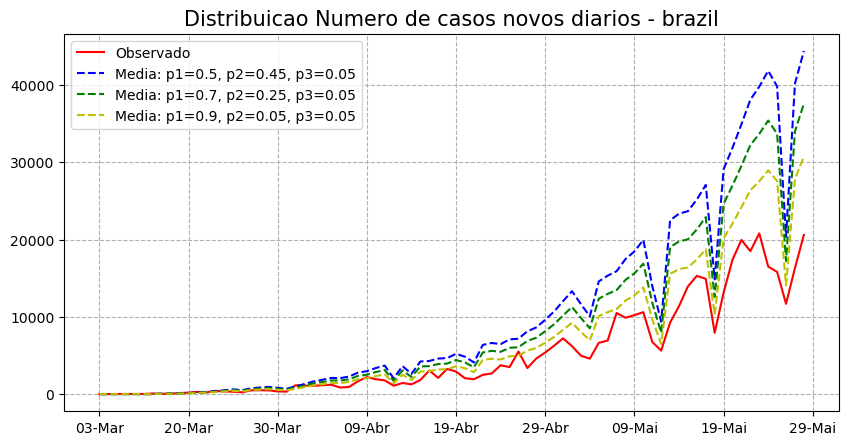

In [120]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_brazil,'r',label='Observado')
plt.plot(brazil_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(brazil_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(brazil_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - brazil',fontsize=15)
ax.set_xticklabels(labels)


plt.grid('on',linestyle='--')
plt.legend(loc=2)

## USA

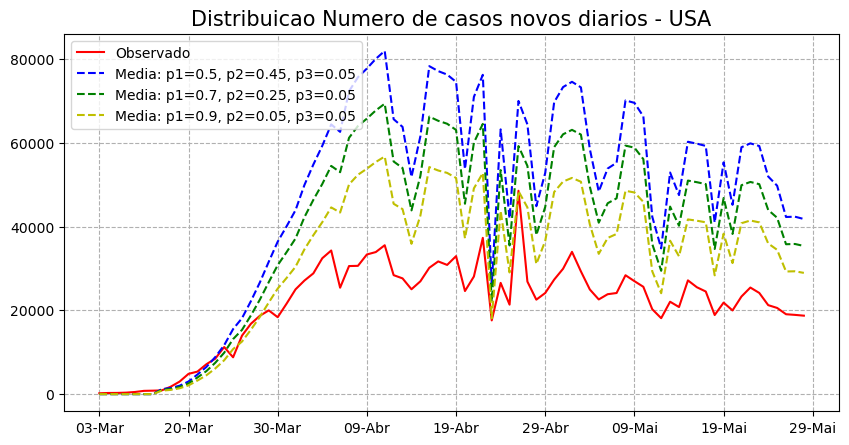

In [122]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_usa,'r',label='Observado')
plt.plot(usa_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(usa_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(usa_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - USA',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

## Canada

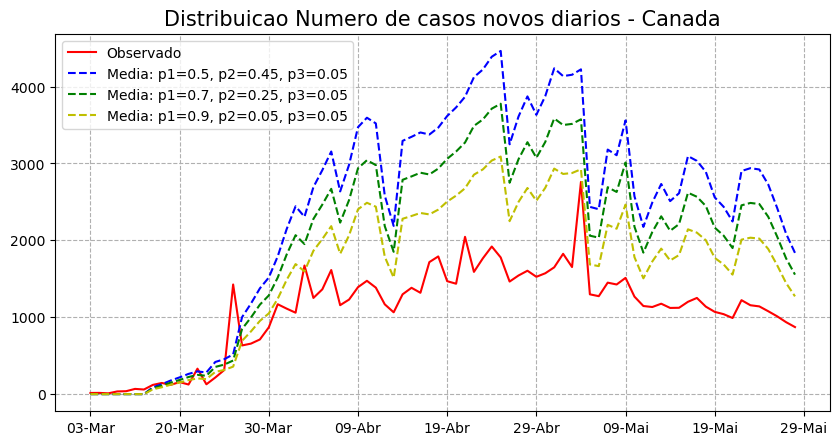

In [123]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_canada,'r',label='Observado')
plt.plot(canada_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(canada_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(canada_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Canada',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

## Espana

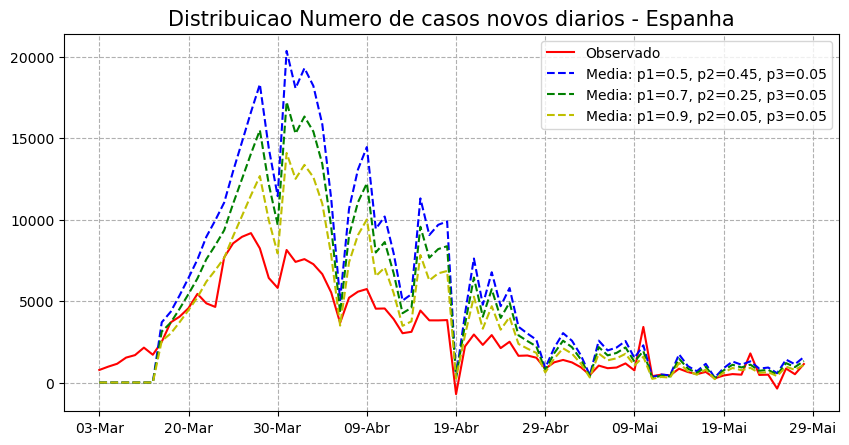

In [124]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_espana,'r',label='Observado')
plt.plot(espana_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(espana_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(espana_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Espanha',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

## Italia

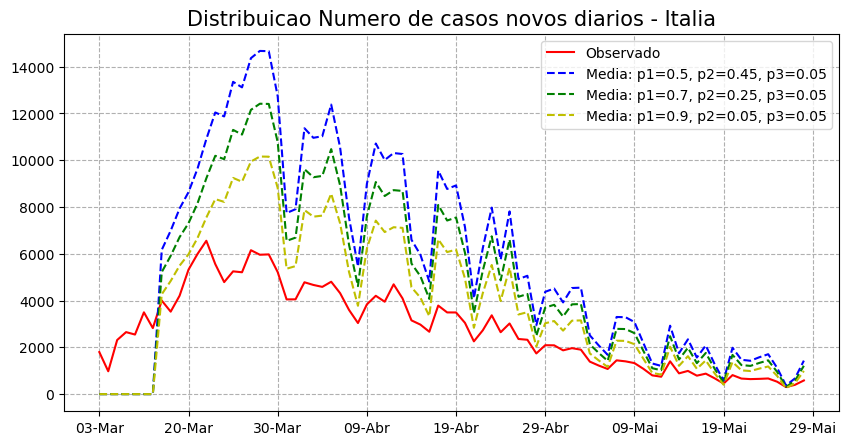

In [125]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_italia,'r',label='Observado')
plt.plot(italia_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(italia_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(italia_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Italia',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

### Usando os dados observados para o modelo, este gera resultados muito boms, mas principalmente para casos onde o numero de casos novos diarios diminui como o Espanha e Italia.

## Previsao

In [95]:
def IMC_SF_COVID19(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])

    for i in range(73):
        N7 = np.mean(data[i:i+7])
#        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]
        
        n1 = p1*Nkt
        n2 = p2*Nkt
        n3 = p3*Nkt

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
                         
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
        
    #Prediccion
    
    dias_pre = 13
    
    g = np.zeros([dias_pre])

    g0 = np.zeros([dias_pre])
    
    s = np.zeros([dias_pre])
    
    Ns_pre = np.zeros([8+dias_pre])
    Ns_pre[0:8] = Ns_mean[72:80]
    
    Ns_pre_min = np.zeros([8+dias_pre])
    Ns_pre_min[0:8] = Ns_min[72:80]
    
    Ns_pre_max = np.zeros([8+dias_pre])
    Ns_pre_max[0:8] = Ns_max[72:80]
    
    for i in range(dias_pre):
        N7 = np.mean(Ns_pre[i:i+7])
#        N7 = (np.mean(data[i:i+7]) + 4*data[i+7]) /2
            
        Nkt = Ns_pre[i+7]

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
            
        Ns_pre_min[i+8] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_pre_max[i+8] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
        Ns_pre[i+8] = (Ns_pre_max[i+8] + Ns_pre_min[i+8])/2
        
        q_g = (1-g[i])*(1-g[i])
        q_g0 = (1-g0[i])*(1-g0[i])

        if g0[i] >= g[i]:
            delta_g = (g0[i] - g[i]) + q_g0
        else:
            delta_g = (g0[i] - g[i]) - q_g

        delta_nk = (N7 - Nkt)/Nkt

        s[i] = (2*delta_g + delta_nk)/3
    
    return Ns_mean,Ns_pre,g,s

### Usando os mesmos agrupamentos para p.

In [96]:
p11 = 0.5;p12 = 0.45;p13 = 0.05

p21 = 0.7;p22 = 0.25;p23 = 0.05

p31 = 0.9;p32 = 0.05;p33 = 0.05

In [97]:
Ns_mean_brazil1,Ns_pre_brazil1,g_brasil1,s_brasil1 = IMC_SF_COVID19(covid19_casos_brazil,p11,p12,p13)
Ns_mean_brazil2,Ns_pre_brazil2,g_brasil2,s_brasil2 = IMC_SF_COVID19(covid19_casos_brazil,p21,p22,p23)
Ns_mean_brazil3,Ns_pre_brazil3,g_brasil3,s_brasil3 = IMC_SF_COVID19(covid19_casos_brazil,p31,p32,p33)

Ns_mean_usa1,Ns_pre_usa1,g_usa1,s_usa1 = IMC_SF_COVID19(covid19_casos_usa,p11,p12,p13)
Ns_mean_usa2,Ns_pre_usa2,g_usa2,s_usa2 = IMC_SF_COVID19(covid19_casos_usa,p21,p22,p23)
Ns_mean_usa3,Ns_pre_usa3,g_usa3,s_usa3 = IMC_SF_COVID19(covid19_casos_usa,p31,p32,p33)

Ns_mean_canada1,Ns_pre_canada1,g_canada1,s_canada1 = IMC_SF_COVID19(covid19_casos_canada,p11,p12,p13)
Ns_mean_canada2,Ns_pre_canada2,g_canada2,s_canada2 = IMC_SF_COVID19(covid19_casos_canada,p21,p22,p23)
Ns_mean_canada3,Ns_pre_canada3,g_canada3,s_canada3 = IMC_SF_COVID19(covid19_casos_canada,p31,p32,p33)

Ns_mean_espana1,Ns_pre_espana1,g_espana1,s_espana1 = IMC_SF_COVID19(covid19_casos_espana,p11,p12,p13)
Ns_mean_espana2,Ns_pre_espana2,g_espana2,s_espana2 = IMC_SF_COVID19(covid19_casos_espana,p21,p22,p23)
Ns_mean_espana3,Ns_pre_espana3,g_espana3,s_espana3 = IMC_SF_COVID19(covid19_casos_espana,p31,p32,p33)

Ns_mean_italia1,Ns_pre_italia1,g_italia1,s_italia1 = IMC_SF_COVID19(covid19_casos_italia,p11,p12,p13)
Ns_mean_italia2,Ns_pre_italia2,g_italia2,s_italia2 = IMC_SF_COVID19(covid19_casos_italia,p21,p22,p23)
Ns_mean_italia3,Ns_pre_italia3,g_italia3,s_italia3 = IMC_SF_COVID19(covid19_casos_italia,p31,p32,p33)

In [98]:
brazil1 = np.concatenate((Ns_mean_brazil1,Ns_pre_brazil1[8:]), axis=0)
brazil2 = np.concatenate((Ns_mean_brazil2,Ns_pre_brazil2[8:]), axis=0)
brazil3 = np.concatenate((Ns_mean_brazil3,Ns_pre_brazil3[8:]), axis=0)

usa1 = np.concatenate((Ns_mean_usa1,Ns_pre_usa1[8:]), axis=0)
usa2 = np.concatenate((Ns_mean_usa2,Ns_pre_usa2[8:]), axis=0)
usa3 = np.concatenate((Ns_mean_usa3,Ns_pre_usa3[8:]), axis=0)

canada1 = np.concatenate((Ns_mean_canada1,Ns_pre_canada1[8:]), axis=0)
canada2 = np.concatenate((Ns_mean_canada2,Ns_pre_canada2[8:]), axis=0)
canada3 = np.concatenate((Ns_mean_canada3,Ns_pre_canada3[8:]), axis=0)

espana1 = np.concatenate((Ns_mean_espana1,Ns_pre_espana1[8:]), axis=0)
espana2 = np.concatenate((Ns_mean_espana2,Ns_pre_espana2[8:]), axis=0)
espana3 = np.concatenate((Ns_mean_espana3,Ns_pre_espana3[8:]), axis=0)

italia1 = np.concatenate((Ns_mean_italia1,Ns_pre_italia1[8:]), axis=0)
italia2 = np.concatenate((Ns_mean_italia2,Ns_pre_italia2[8:]), axis=0)
italia3 = np.concatenate((Ns_mean_italia3,Ns_pre_italia3[8:]), axis=0)

## Resultados Previsao

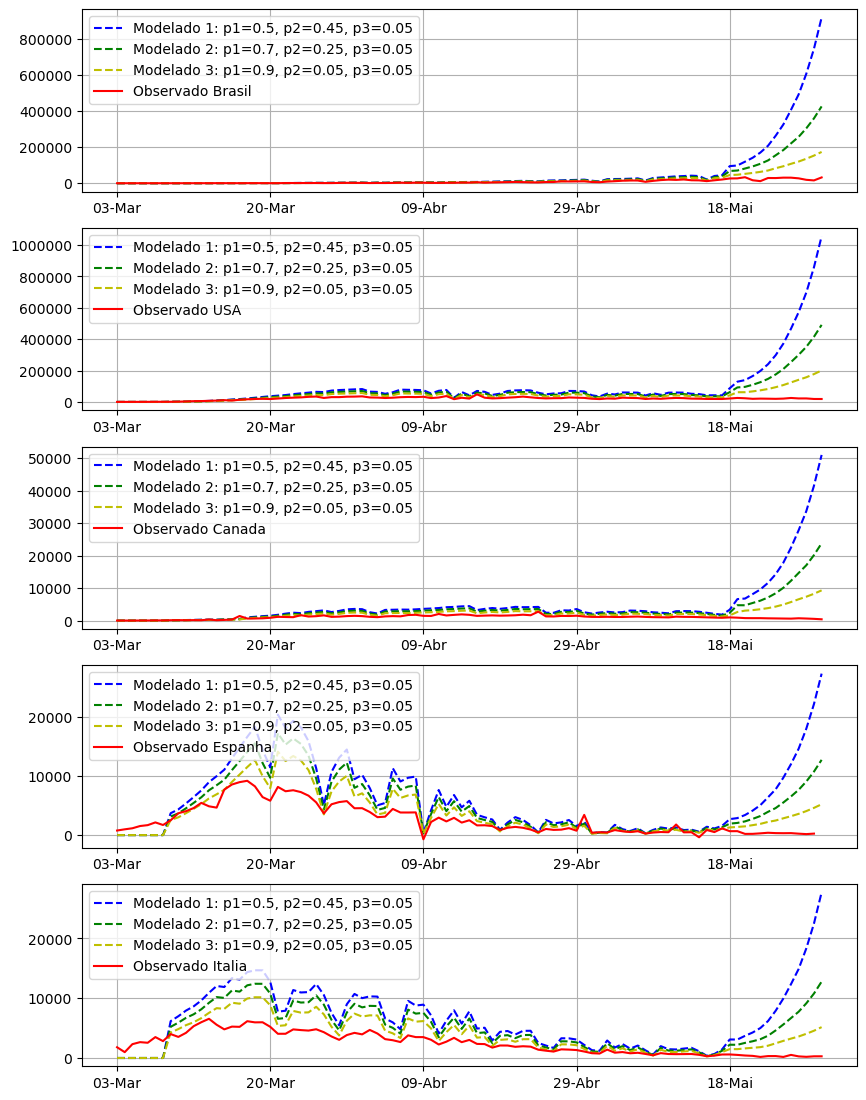

In [99]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'Modelado 1: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13)
label2 = 'Modelado 2: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23)
label3 = 'Modelado 3: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33)

ax = plt.subplot(5,1,1)
plt.plot(brazil1,'--b',label=label1)
plt.plot(brazil2,'--g',label=label2)
plt.plot(brazil3,'--y',label=label3)
plt.plot(covid19_brazil.new_cases[70:170].reset_index(drop=True),'r',label='Observado Brasil')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend()
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(usa1,'--b',label=label1)
plt.plot(usa2,'--g',label=label2)
plt.plot(usa3,'--y',label=label3)
plt.plot(covid19_usa.new_cases[70:170].reset_index(drop=True),'r',label='Observado USA')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(canada1,'--b',label=label1)
plt.plot(canada2,'--g',label=label2)
plt.plot(canada3,'--y',label=label3)
plt.plot(covid19_canada.new_cases[70:170].reset_index(drop=True),'r',label='Observado Canada')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(espana1,'--b',label=label1)
plt.plot(espana2,'--g',label=label2)
plt.plot(espana3,'--y',label=label3)
plt.plot(covid19_espana.new_cases[70:170].reset_index(drop=True),'r',label='Observado Espanha')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(italia1,'--b',label=label1)
plt.plot(italia2,'--g',label=label2)
plt.plot(italia3,'--y',label=label3)
plt.plot(covid19_italia.new_cases[70:170].reset_index(drop=True),'r',label='Observado Italia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

### O problema é quando usamos dados de previsão do modelo (apartir do dia 29 de maio), pois, usando esses dados, a função representativa do número de novos casos por dia predita aumenta exponencialmente.
### os resultados mostram que quanto menor o valor de p1 o numero de infetados aumenta de forma mais divagar.

## Mostrando o s e g

## Plot 6

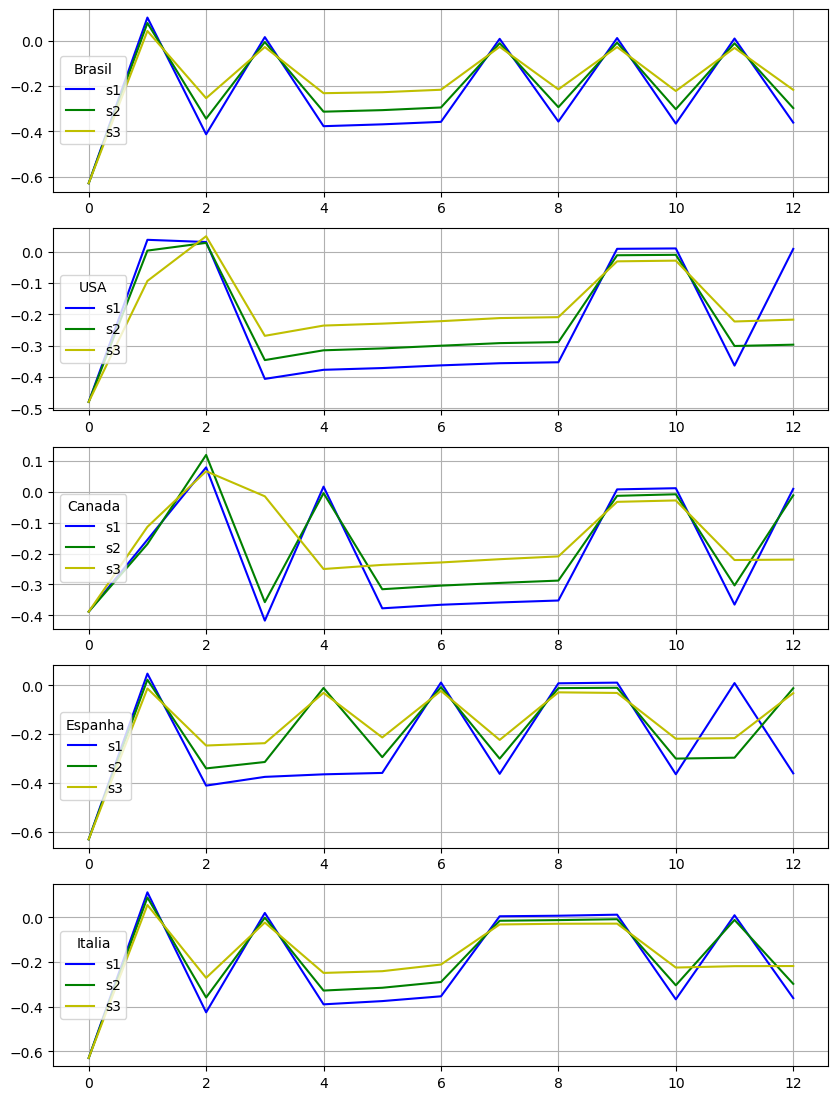

In [100]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 's1'
label2 = 's2'
label3 = 's3'

ax = plt.subplot(5,1,1)
plt.plot(s_brasil1,'b',label=label1)
plt.plot(s_brasil2,'g',label=label2)
plt.plot(s_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(s_usa1,'b',label=label1)
plt.plot(s_usa2,'g',label=label2)
plt.plot(s_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(s_canada1,'b',label=label1)
plt.plot(s_canada2,'g',label=label2)
plt.plot(s_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(s_espana1,'b',label=label1)
plt.plot(s_espana2,'g',label=label2)
plt.plot(s_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(s_italia1,'b',label=label1)
plt.plot(s_italia2,'g',label=label2)
plt.plot(s_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc='center left')
plt.grid(True)

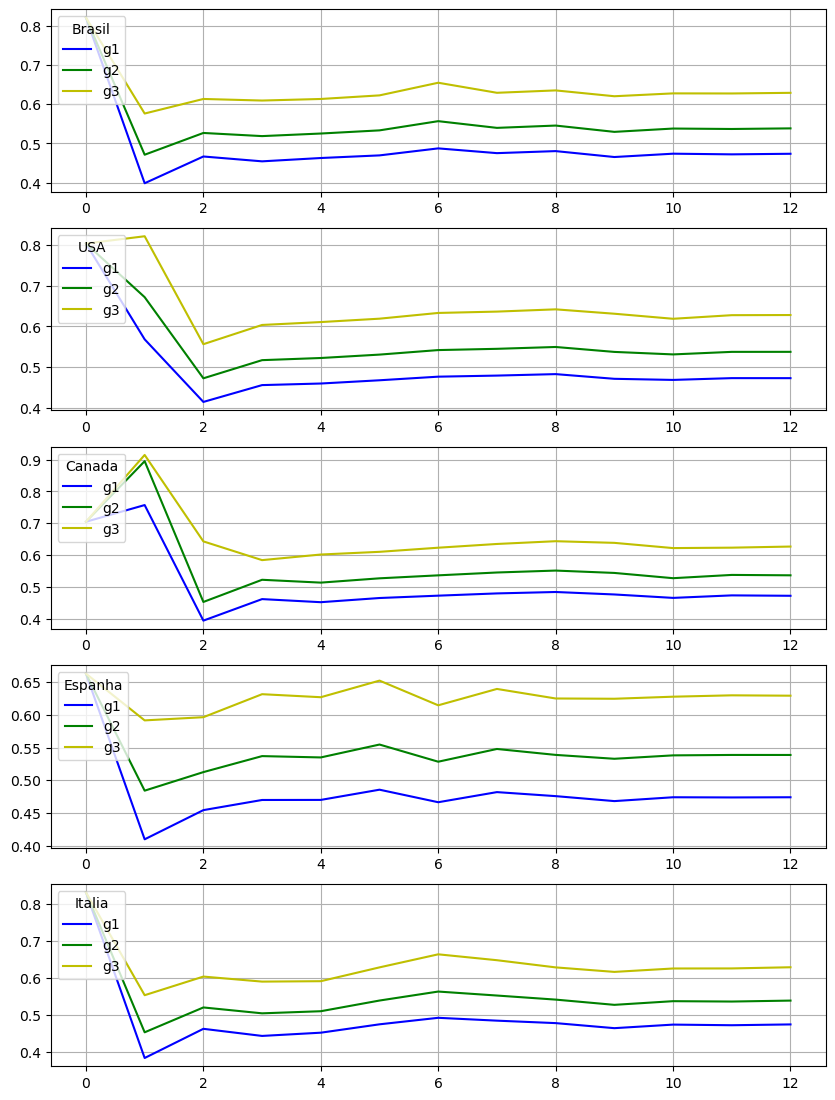

In [101]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'g1'
label2 = 'g2'
label3 = 'g3'

ax = plt.subplot(5,1,1)
plt.plot(g_brasil1,'b',label=label1)
plt.plot(g_brasil2,'g',label=label2)
plt.plot(g_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(g_usa1,'b',label=label1)
plt.plot(g_usa2,'g',label=label2)
plt.plot(g_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(g_canada1,'b',label=label1)
plt.plot(g_canada2,'g',label=label2)
plt.plot(g_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(g_espana1,'b',label=label1)
plt.plot(g_espana2,'g',label=label2)
plt.plot(g_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(g_italia1,'b',label=label1)
plt.plot(g_italia2,'g',label=label2)
plt.plot(g_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc=2)
plt.grid(True)

## Fazendo testes com o modelo IMC-SF-COVID19
### Modificando o valor de N7 que originalmente e a media dos 7 dias anteriores
### N7 = np.mean( data[i:i+7] )
### N7 = (np.mean( data[i:i+7]) + 4*data[i+7])/2
### agora se toma em conta o dia atual

In [131]:
def IMC_SF_COVID19_v2(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])

    for i in range(73):
#        N7 = np.mean(data[i:i+7])
        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
                    
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
    
    return Ns_min,Ns_max,Ns_mean

## Usando os mesmo tres conjuntos
### e usando a versao modificada do modelo 

In [141]:
p11 = 0.5;p12 = 0.45;p13 = 0.05

brazil_min1,brazil_max1,brazil_mean21 = IMC_SF_COVID19_v2(covid19_casos_brazil,p11,p12,p13)  

usa_min1,usa_max1,usa_mean21 = IMC_SF_COVID19_v2(covid19_casos_usa,p11,p12,p13)

canada_min1,canada_max1,canada_mean21 = IMC_SF_COVID19_v2(covid19_casos_canada,p11,p12,p13)

espana_min1,espana_max1,espana_mean21 = IMC_SF_COVID19_v2(covid19_casos_espana,p11,p12,p13)

italia_min1,italia_max1,italia_mean21 = IMC_SF_COVID19_v2(covid19_casos_italia,p11,p12,p13)

In [142]:
p21 = 0.7; p22 = 0.25; p23 = 0.05

brazil_min2,brazil_max2,brazil_mean22 = IMC_SF_COVID19_v2(covid19_casos_brazil,p21,p22,p23)    

usa_min2,usa_max2,usa_mean22 = IMC_SF_COVID19_v2(covid19_casos_usa,p21,p22,p23)

canada_min2,canada_max2,canada_mean22 = IMC_SF_COVID19_v2(covid19_casos_canada,p21,p22,p23)

espana_min2,espana_max2,espana_mean22 = IMC_SF_COVID19_v2(covid19_casos_espana,p21,p22,p23)

italia_min2,italia_max2,italia_mean22 = IMC_SF_COVID19_v2(covid19_casos_italia,p21,p22,p23)

In [143]:
p31 = 0.9; p32 = 0.05; p33 = 0.05

brazil_min3,brazil_max3,brazil_mean23 = IMC_SF_COVID19_v2(covid19_casos_brazil,p31,p32,p33) 

usa_min3,usa_max3,usa_mean23 = IMC_SF_COVID19_v2(covid19_casos_usa,p31,p32,p33)

canada_min3,canada_max3,canada_mean23 = IMC_SF_COVID19_v2(covid19_casos_canada,p31,p32,p33)

espana_min3,espana_max3,espana_mean23 = IMC_SF_COVID19_v2(covid19_casos_espana,p31,p32,p33)

italia_min3,italia_max3,italia_mean23 = IMC_SF_COVID19_v2(covid19_casos_italia,p31,p32,p33)

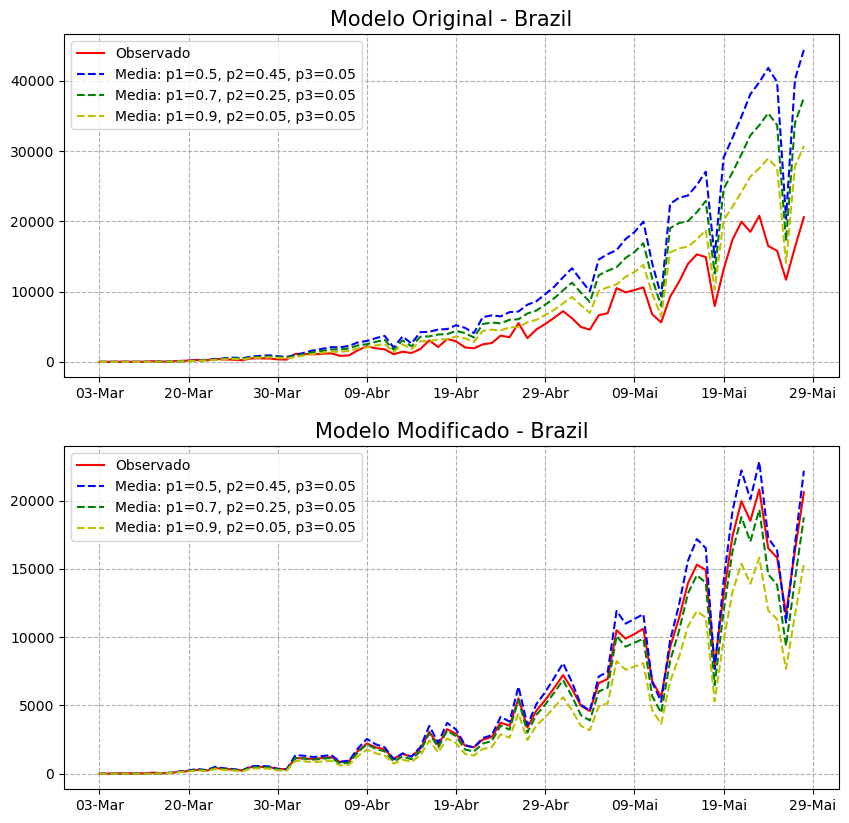

In [160]:
fig,plt.subplots(figsize=(10,10),dpi=100)
ax = plt.subplot(2,1,1)
plt.plot(covid19_casos_brazil,'r',label='Observado')
plt.plot(brazil_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(brazil_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(brazil_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Original - Brazil',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

ax = plt.subplot(2,1,2)
plt.plot(covid19_casos_brazil,'r',label='Observado')
plt.plot(brazil_mean21,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(brazil_mean22,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(brazil_mean23,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Modificado - Brazil',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

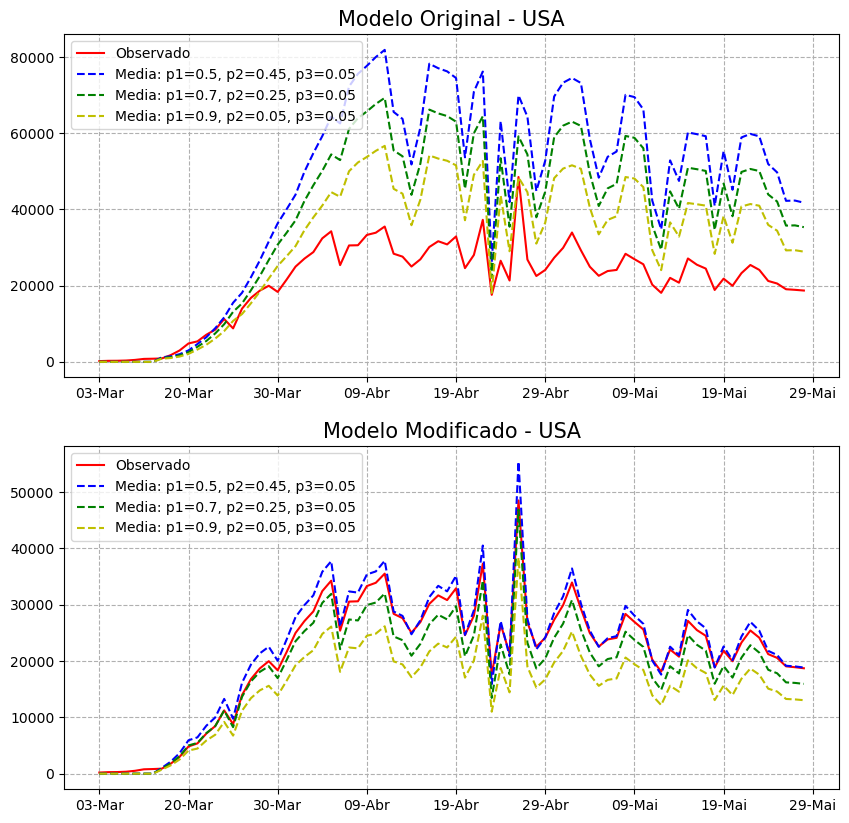

In [159]:
fig,plt.subplots(figsize=(10,10),dpi=100)
ax = plt.subplot(2,1,1)
plt.plot(covid19_casos_usa,'r',label='Observado')
plt.plot(usa_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(usa_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(usa_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Original - USA',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)



ax = plt.subplot(2,1,2)
plt.plot(covid19_casos_usa,'r',label='Observado')
plt.plot(usa_mean21,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(usa_mean22,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(usa_mean23,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Modificado - USA',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

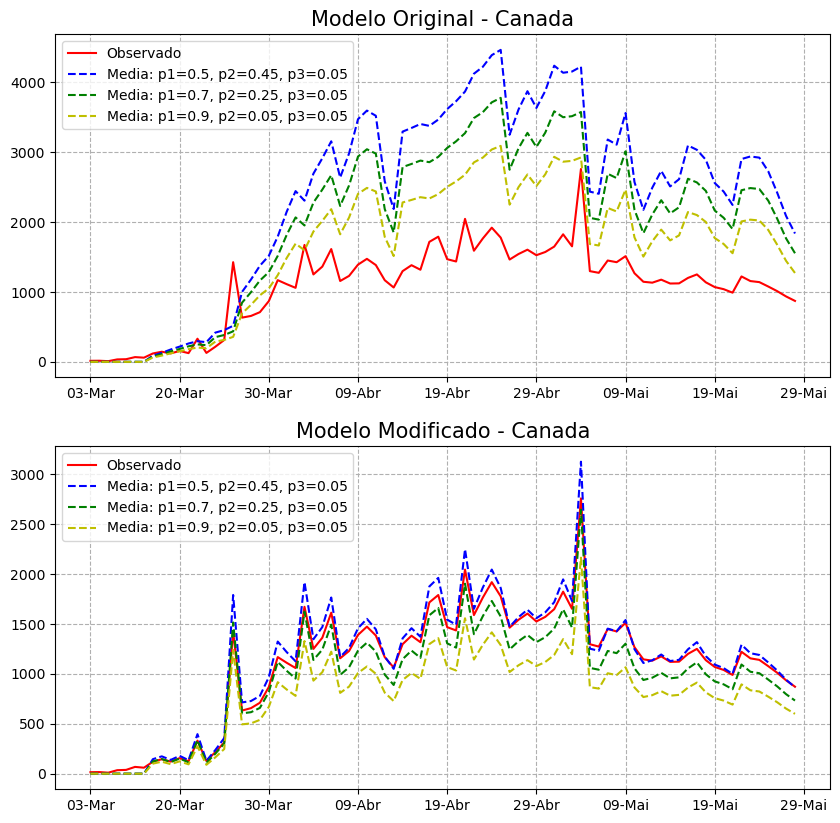

In [163]:
fig,plt.subplots(figsize=(10,10),dpi=100)
ax = plt.subplot(2,1,1)
plt.plot(covid19_casos_canada,'r',label='Observado')
plt.plot(canada_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(canada_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(canada_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Original - Canada',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)



ax = plt.subplot(2,1,2)
plt.plot(covid19_casos_canada,'r',label='Observado')
plt.plot(canada_mean21,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(canada_mean22,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(canada_mean23,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Modificado - Canada',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=2)

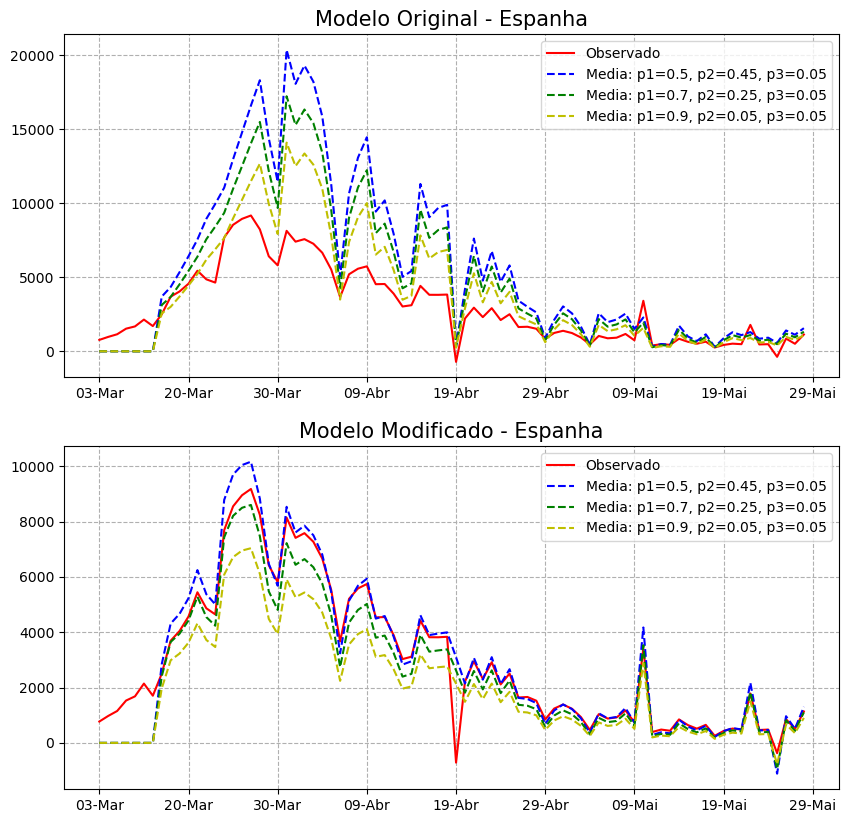

In [164]:
fig,plt.subplots(figsize=(10,10),dpi=100)
ax = plt.subplot(2,1,1)
plt.plot(covid19_casos_espana,'r',label='Observado')
plt.plot(espana_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(espana_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(espana_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Original - Espanha',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

ax = plt.subplot(2,1,2)
plt.plot(covid19_casos_espana,'r',label='Observado')
plt.plot(espana_mean21,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(espana_mean22,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(espana_mean23,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Modificado - Espanha',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

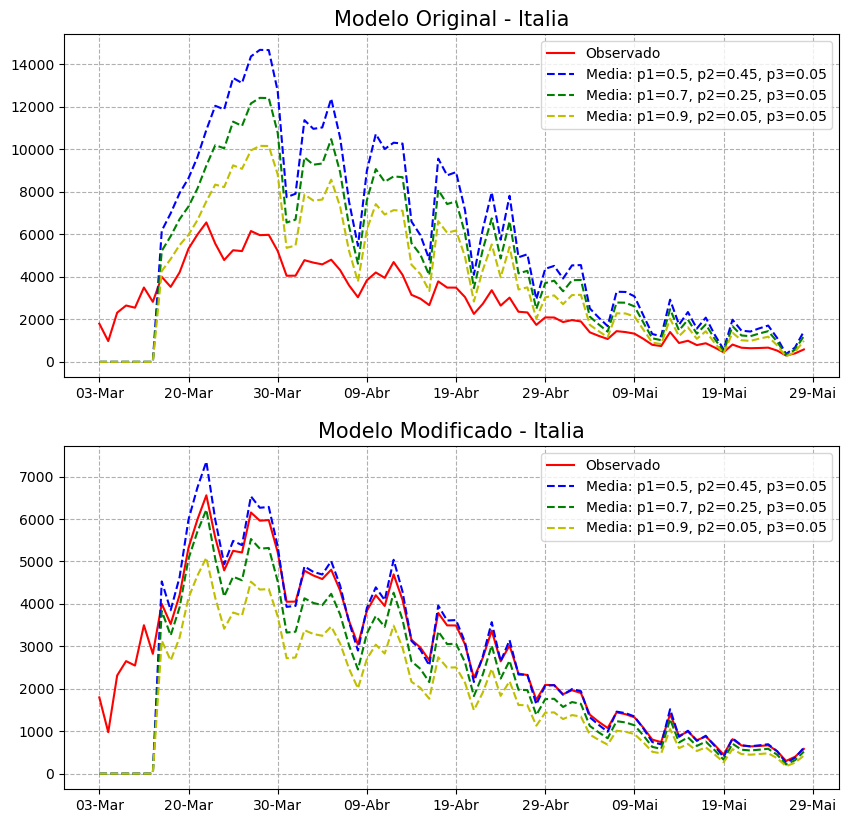

In [165]:
fig,plt.subplots(figsize=(10,10),dpi=100)
ax = plt.subplot(2,1,1)
plt.plot(covid19_casos_italia,'r',label='Observado')
plt.plot(italia_mean1,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(italia_mean2,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(italia_mean3,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Original - Italia',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

ax = plt.subplot(2,1,2)
plt.plot(covid19_casos_italia,'r',label='Observado')
plt.plot(italia_mean21,'--b',label='Media: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13))
plt.plot(italia_mean22,'--g',label='Media: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23))
plt.plot(italia_mean23,'--y',label='Media: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Modelo Modificado - Italia',fontsize=15)
ax.set_xticklabels(labels)

plt.grid('on',linestyle='--')
plt.legend(loc=1)

### Cálculo da correlação do modelo original e do modelo modificado em relação aos dados observados.

In [192]:
Resultados = pd.DataFrame({'Pais':['Brasil','USA','Canada','Espana','Italia'],\
                           'Corr_Modelo':[pearsonr(covid19_casos_brazil,brazil_mean1)[0],
                                          pearsonr(covid19_casos_usa,usa_mean1)[0],
                                          pearsonr(covid19_casos_canada,canada_mean1)[0],
                                          pearsonr(covid19_casos_espana,espana_mean1)[0],
                                          pearsonr(covid19_casos_italia,italia_mean1)[0]],
                           'Corr_Modifi':[pearsonr(covid19_casos_brazil,brazil_mean21)[0],
                                          pearsonr(covid19_casos_usa,usa_mean21)[0],
                                          pearsonr(covid19_casos_canada,canada_mean21)[0],
                                          pearsonr(covid19_casos_espana,espana_mean21)[0],
                                          pearsonr(covid19_casos_italia,italia_mean21)[0]]})

In [193]:
Resultados

Pais  Corr_Modelo  Corr_Modifi
0  Brasil     0.981518     0.998624
1     USA     0.952279     0.995585
2  Canada     0.930278     0.995089
3  Espana     0.942712     0.971676
4  Italia     0.902183     0.929788

### Quando os dados observados são utilizados, para gerar valores do número de casos novos, o modelo IMC-SF-COVID19 mostra resultados bastante adequados debido a que mantêm a tendência da série original), que são levemente melhorados com a modificação do N7.

In [297]:
def IMC_SF_COVID19_v21(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])

    for i in range(73):
#        N7 = np.mean(data[i:i+7])
        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]
        
        n1 = p1*Nkt
        n2 = p2*Nkt
        n3 = p3*Nkt

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
                         
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
        
    #Prediccion
    
    dias_pre = 13
    
    g = np.zeros([dias_pre])

    g0 = np.zeros([dias_pre])
    
    s = np.zeros([dias_pre])
    
    Ns_pre = np.zeros([8+dias_pre])
    Ns_pre[0:8] = Ns_mean[72:80]
    
    Ns_pre_min = np.zeros([8+dias_pre])
    Ns_pre_min[0:8] = Ns_min[72:80]
    
    Ns_pre_max = np.zeros([8+dias_pre])
    Ns_pre_max[0:8] = Ns_max[72:80]
    
    for i in range(dias_pre):

        Nkt = Ns_pre[i+7]
        
        N7 = (np.mean(Ns_pre[i:i+7]) + 4*Ns_pre[i+7]) /2

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
            
        Ns_pre_min[i+8] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_pre_max[i+8] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
        Ns_pre[i+8] = (Ns_pre_max[i+8] + Ns_pre_min[i+8])/2
        
        q_g = (1-g[i])*(1-g[i])
        q_g0 = (1-g0[i])*(1-g0[i])

        if g0[i] >= g[i]:
            delta_g = (g0[i] - g[i]) + q_g0
        else:
            delta_g = (g0[i] - g[i]) - q_g

        delta_nk = (N7 - Nkt)/Nkt

        s[i] = (2*delta_g + delta_nk)/3
    
    return Ns_mean,Ns_pre,g,s

In [298]:
Ns_mean_brazil1,Ns_pre_brazil1,g_brasil1,s_brasil1 = IMC_SF_COVID19_v21(covid19_casos_brazil,p11,p12,p13)
Ns_mean_brazil2,Ns_pre_brazil2,g_brasil2,s_brasil2 = IMC_SF_COVID19_v21(covid19_casos_brazil,p21,p22,p23)
Ns_mean_brazil3,Ns_pre_brazil3,g_brasil3,s_brasil3 = IMC_SF_COVID19_v21(covid19_casos_brazil,p31,p32,p33)

Ns_mean_usa1,Ns_pre_usa1,g_usa1,s_usa1 = IMC_SF_COVID19_v21(covid19_casos_usa,p11,p12,p13)
Ns_mean_usa2,Ns_pre_usa2,g_usa2,s_usa2 = IMC_SF_COVID19_v21(covid19_casos_usa,p21,p22,p23)
Ns_mean_usa3,Ns_pre_usa3,g_usa3,s_usa3 = IMC_SF_COVID19_v21(covid19_casos_usa,p31,p32,p33)

Ns_mean_canada1,Ns_pre_canada1,g_canada1,s_canada1 = IMC_SF_COVID19_v21(covid19_casos_canada,p11,p12,p13)
Ns_mean_canada2,Ns_pre_canada2,g_canada2,s_canada2 = IMC_SF_COVID19_v21(covid19_casos_canada,p21,p22,p23)
Ns_mean_canada3,Ns_pre_canada3,g_canada3,s_canada3 = IMC_SF_COVID19_v21(covid19_casos_canada,p31,p32,p33)

Ns_mean_espana1,Ns_pre_espana1,g_espana1,s_espana1 = IMC_SF_COVID19_v21(covid19_casos_espana,p11,p12,p13)
Ns_mean_espana2,Ns_pre_espana2,g_espana2,s_espana2 = IMC_SF_COVID19_v21(covid19_casos_espana,p21,p22,p23)
Ns_mean_espana3,Ns_pre_espana3,g_espana3,s_espana3 = IMC_SF_COVID19_v21(covid19_casos_espana,p31,p32,p33)

Ns_mean_italia1,Ns_pre_italia1,g_italia1,s_italia1 = IMC_SF_COVID19_v21(covid19_casos_italia,p11,p12,p13)
Ns_mean_italia2,Ns_pre_italia2,g_italia2,s_italia2 = IMC_SF_COVID19_v21(covid19_casos_italia,p21,p22,p23)
Ns_mean_italia3,Ns_pre_italia3,g_italia3,s_italia3 = IMC_SF_COVID19_v21(covid19_casos_italia,p31,p32,p33)

In [299]:
brazil1 = np.concatenate((Ns_mean_brazil1,Ns_pre_brazil1[8:]), axis=0)
brazil2 = np.concatenate((Ns_mean_brazil2,Ns_pre_brazil2[8:]), axis=0)
brazil3 = np.concatenate((Ns_mean_brazil3,Ns_pre_brazil3[8:]), axis=0)

usa1 = np.concatenate((Ns_mean_usa1,Ns_pre_usa1[8:]), axis=0)
usa2 = np.concatenate((Ns_mean_usa2,Ns_pre_usa2[8:]), axis=0)
usa3 = np.concatenate((Ns_mean_usa3,Ns_pre_usa3[8:]), axis=0)

canada1 = np.concatenate((Ns_mean_canada1,Ns_pre_canada1[8:]), axis=0)
canada2 = np.concatenate((Ns_mean_canada2,Ns_pre_canada2[8:]), axis=0)
canada3 = np.concatenate((Ns_mean_canada3,Ns_pre_canada3[8:]), axis=0)

espana1 = np.concatenate((Ns_mean_espana1,Ns_pre_espana1[8:]), axis=0)
espana2 = np.concatenate((Ns_mean_espana2,Ns_pre_espana2[8:]), axis=0)
espana3 = np.concatenate((Ns_mean_espana3,Ns_pre_espana3[8:]), axis=0)

italia1 = np.concatenate((Ns_mean_italia1,Ns_pre_italia1[8:]), axis=0)
italia2 = np.concatenate((Ns_mean_italia2,Ns_pre_italia2[8:]), axis=0)
italia3 = np.concatenate((Ns_mean_italia3,Ns_pre_italia3[8:]), axis=0)

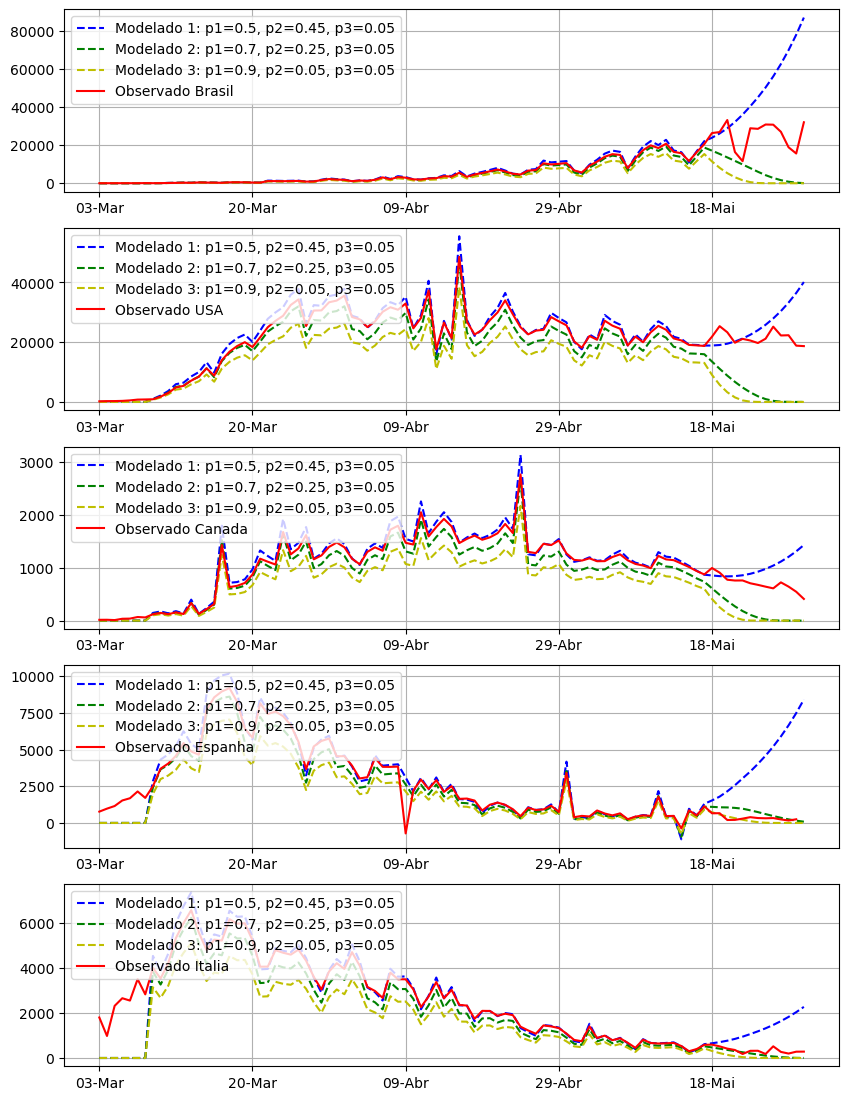

In [300]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'Modelado 1: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13)
label2 = 'Modelado 2: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23)
label3 = 'Modelado 3: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33)

ax = plt.subplot(5,1,1)
plt.plot(brazil1,'--b',label=label1)
plt.plot(brazil2,'--g',label=label2)
plt.plot(brazil3,'--y',label=label3)
plt.plot(covid19_brazil.new_cases[70:170].reset_index(drop=True),'r',label='Observado Brasil')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend()
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(usa1,'--b',label=label1)
plt.plot(usa2,'--g',label=label2)
plt.plot(usa3,'--y',label=label3)
plt.plot(covid19_usa.new_cases[70:170].reset_index(drop=True),'r',label='Observado USA')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(canada1,'--b',label=label1)
plt.plot(canada2,'--g',label=label2)
plt.plot(canada3,'--y',label=label3)
plt.plot(covid19_canada.new_cases[70:170].reset_index(drop=True),'r',label='Observado Canada')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(espana1,'--b',label=label1)
plt.plot(espana2,'--g',label=label2)
plt.plot(espana3,'--y',label=label3)
plt.plot(covid19_espana.new_cases[70:170].reset_index(drop=True),'r',label='Observado Espanha')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(italia1,'--b',label=label1)
plt.plot(italia2,'--g',label=label2)
plt.plot(italia3,'--y',label=label3)
plt.plot(covid19_italia.new_cases[70:170].reset_index(drop=True),'r',label='Observado Italia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

### Para Todos casos, o modelo fornece um resultado em que o número de casos diários cresce quase exponencialmente (50%) e nos casos em que a porcentagem de pessoas isoladas está entre 70% e 90%, o modelo mostra uma tendência negativa nos cinco casos agora para os casos de Espanha e Itália, os resultados obtidos foram mais adequados para 0.7 e 0.9.

## s e g

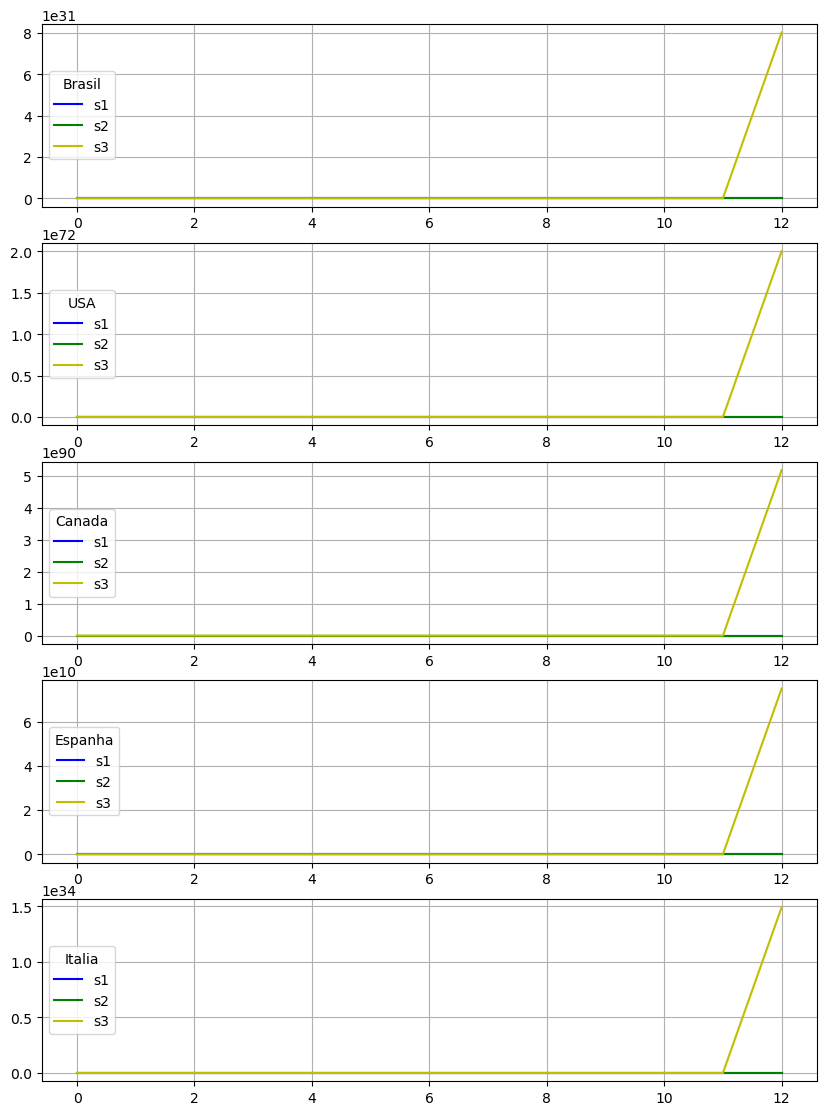

In [353]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 's1'
label2 = 's2'
label3 = 's3'

ax = plt.subplot(5,1,1)
plt.plot(s_brasil1,'b',label=label1)
plt.plot(s_brasil2,'g',label=label2)
plt.plot(s_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(s_usa1,'b',label=label1)
plt.plot(s_usa2,'g',label=label2)
plt.plot(s_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(s_canada1,'b',label=label1)
plt.plot(s_canada2,'g',label=label2)
plt.plot(s_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(s_espana1,'b',label=label1)
plt.plot(s_espana2,'g',label=label2)
plt.plot(s_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(s_italia1,'b',label=label1)
plt.plot(s_italia2,'g',label=label2)
plt.plot(s_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc='center left')
plt.grid(True)

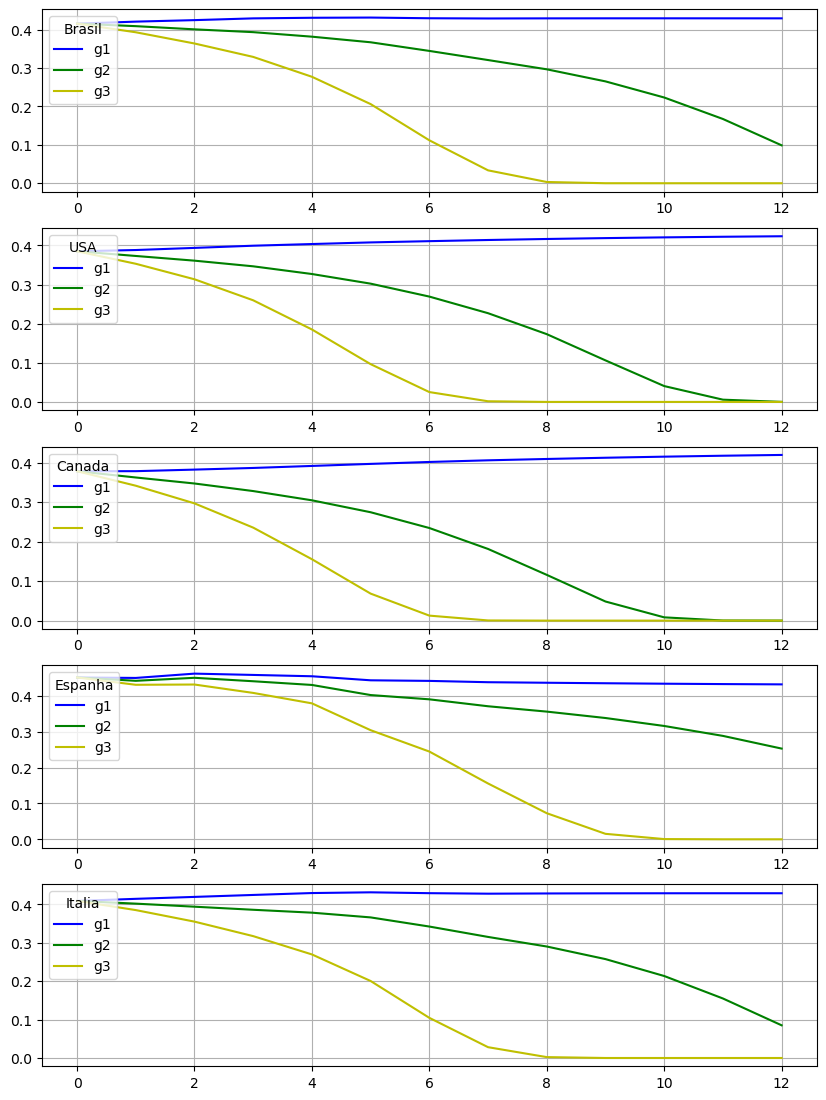

In [354]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'g1'
label2 = 'g2'
label3 = 'g3'

ax = plt.subplot(5,1,1)
plt.plot(g_brasil1,'b',label=label1)
plt.plot(g_brasil2,'g',label=label2)
plt.plot(g_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(g_usa1,'b',label=label1)
plt.plot(g_usa2,'g',label=label2)
plt.plot(g_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(g_canada1,'b',label=label1)
plt.plot(g_canada2,'g',label=label2)
plt.plot(g_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(g_espana1,'b',label=label1)
plt.plot(g_espana2,'g',label=label2)
plt.plot(g_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(g_italia1,'b',label=label1)
plt.plot(g_italia2,'g',label=label2)
plt.plot(g_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc=2)
plt.grid(True)